In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [ ]:
# dataframe completo
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Regras de detecção/exported_analysis.csv')

In [ ]:
# prompt: remove createdAt and updatedAt from df

df = df.drop(['createdAt', 'updatedAt'], axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 10 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   followingToFollowerRatioScore          200000 non-null  float64
 1   retweetToTweetRatioScore               177494 non-null  float64
 2   mentionsPerUserScore                   180506 non-null  float64
 3   tweetSizeAvgScore                      200000 non-null  float64
 4   accountAgeScore                        200000 non-null  float64
 5   hashtagUsageScore                      173189 non-null  float64
 6   tweetCountToAccountAgeScore            199514 non-null  float64
 7   similarityBetweenNameAndUsernameScore  200000 non-null  float64
 8   avgTimeBetweenPostsScore               196636 non-null  float64
 9   accountType                            200000 non-null  object 
dtypes: float64(9), object(1)
memory usage: 15.3+ MB


In [ ]:
# dividindo dataset em bots e humanos

df_bot = df[df['accountType'] == 'bot']
df_human = df[df['accountType'] == 'human']

df_bot = df_bot.drop('accountType', axis=1)
df_human = df_human.drop('accountType', axis=1)

In [ ]:
df_bot.info()
df_human.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   followingToFollowerRatioScore          100000 non-null  float64
 1   retweetToTweetRatioScore               82429 non-null   float64
 2   mentionsPerUserScore                   88934 non-null   float64
 3   tweetSizeAvgScore                      100000 non-null  float64
 4   accountAgeScore                        100000 non-null  float64
 5   hashtagUsageScore                      85768 non-null   float64
 6   tweetCountToAccountAgeScore            99655 non-null   float64
 7   similarityBetweenNameAndUsernameScore  100000 non-null  float64
 8   avgTimeBetweenPostsScore               97873 non-null   float64
dtypes: float64(9)
memory usage: 7.6 MB
<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 81940 to 199998
Data columns (total

# Análise individual das regras

In [ ]:
print("Bots - Resumo das estatisticas")
print(df_bot.describe())
print("\nHumans - Resumo das estatisticas")
print(df_human.describe())

Bots - Resumo das estatisticas
       followingToFollowerRatioScore  retweetToTweetRatioScore  \
count                  100000.000000              82429.000000   
mean                        0.999632                  0.440509   
std                         0.483079                  0.272224   
min                         0.000000                  0.000925   
25%                         0.640037                  0.182322   
50%                         1.353984                  0.443931   
75%                         1.388292                  0.693147   
max                         1.388292                  0.772420   

       mentionsPerUserScore  tweetSizeAvgScore  accountAgeScore  \
count          88934.000000      100000.000000    100000.000000   
mean               0.685675           3.635139         7.839024   
std                0.702471           2.051014         0.578532   
min                0.000000           0.000000         6.877296   
25%                0.000000           3

In [ ]:
df_bot.describe()

,followingToFollowerRatioScore,retweetToTweetRatioScore,mentionsPerUserScore,tweetSizeAvgScore,accountAgeScore,hashtagUsageScore,tweetCountToAccountAgeScore,similarityBetweenNameAndUsernameScore,avgTimeBetweenPostsScore
count,100000.000000,82429.000000,88934.000000,100000.000000,100000.000000,85768.000000,99655.000000,100000.000000,97873.000000
mean,0.999632,0.440509,0.685675,3.635139,7.839024,0.399462,0.393211,1.948962,10.101084
std,0.483079,0.272224,0.702471,2.051014,0.578532,0.270613,0.659955,0.745230,5.239347
min,0.000000,0.000925,0.000000,0.000000,6.877296,0.000000,0.000000,0.000000,0.000000
25%,0.640037,0.182322,0.000000,3.433688,7.296413,0.086598,0.008401,1.386294,9.702220
50%,1.353984,0.443931,0.600774,4.537197,7.883823,0.483174,0.085667,2.197225,11.710575
75%,1.388292,0.693147,0.888168,5.031744,8.391176,0.661398,0.462056,2.484907,13.710503
max,1.388292,0.772420,6.655440,6.822586,8.794825,0.693147,7.007428,3.931826,19.023572


In [ ]:
df_human.describe()

,followingToFollowerRatioScore,retweetToTweetRatioScore,mentionsPerUserScore,tweetSizeAvgScore,accountAgeScore,hashtagUsageScore,tweetCountToAccountAgeScore,similarityBetweenNameAndUsernameScore,avgTimeBetweenPostsScore
count,100000.000000,95065.000000,91572.000000,100000.000000,100000.000000,87421.000000,99859.000000,100000.000000,98763.000000
mean,0.660476,0.381256,0.895863,4.323612,8.109892,0.496874,1.125139,2.054436,11.431414
std,0.503437,0.253853,0.741374,1.413285,0.534351,0.210680,1.118430,0.804926,3.279049
min,0.000000,0.000395,0.000000,0.000000,6.878326,0.000000,0.000000,0.000000,0.000000
25%,0.167694,0.149532,0.510826,4.247889,7.711101,0.389465,0.186626,1.609438,10.294812
50%,0.624856,0.354172,0.693147,4.703277,8.303009,0.563935,0.780024,2.197225,11.939772
75%,1.156401,0.617161,1.077559,5.085136,8.562167,0.693147,1.767224,2.564949,13.436730
max,1.388292,0.772420,6.614726,6.770216,8.826001,0.693147,7.352955,4.007333,18.989995


#### **REGRA #1 - PROPORÇÃO DE SEGUIDOS PARA SEGUIDORES**

In [ ]:
print("Descrição de todo o dataset")
print(df['followingToFollowerRatioScore'].describe())
print('-----------------------------------------------------\n')
print("Descrição da porção do dataset dos bots")
print(df_bot['followingToFollowerRatioScore'].describe())
print('-----------------------------------------------------\n')
print("Descrição da porção do dataset dos humanos")
print(df_human['followingToFollowerRatioScore'].describe())

Descrição de todo o dataset
count    200000.000000
mean          0.830054
std           0.521692
min           0.000000
25%           0.342301
50%           0.861385
75%           1.388292
max           1.388292
Name: followingToFollowerRatioScore, dtype: float64
-----------------------------------------------------

Descrição da porção do dataset dos bots
count    100000.000000
mean          0.999632
std           0.483079
min           0.000000
25%           0.640037
50%           1.353984
75%           1.388292
max           1.388292
Name: followingToFollowerRatioScore, dtype: float64
-----------------------------------------------------

Descrição da porção do dataset dos humanos
count    100000.000000
mean          0.660476
std           0.503437
min           0.000000
25%           0.167694
50%           0.624856
75%           1.156401
max           1.388292
Name: followingToFollowerRatioScore, dtype: float64


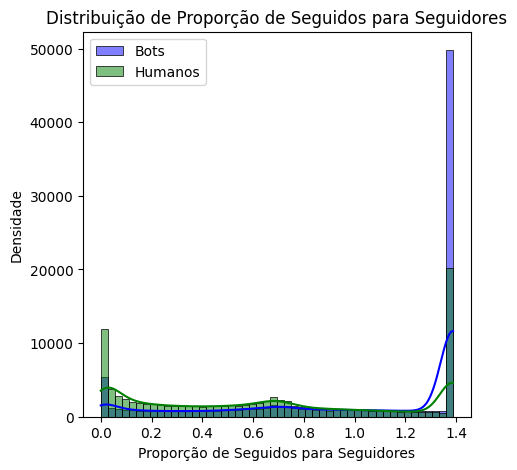

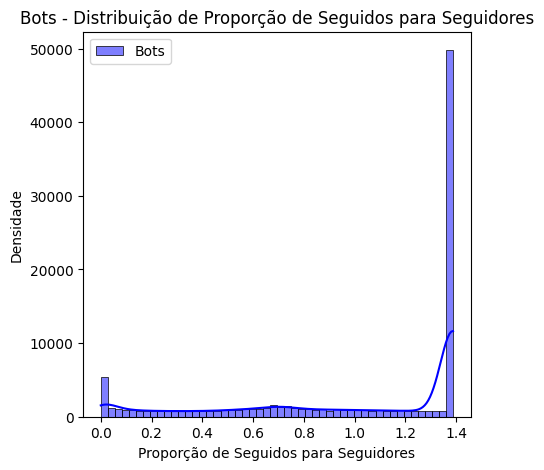

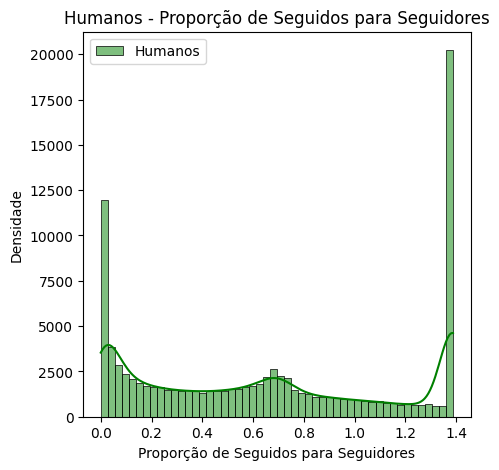

<ipython-input-7-a4bac1da0e60>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='accountType', y='followingToFollowerRatioScore', data=df, palette={"human": "g", "bot": "c"})


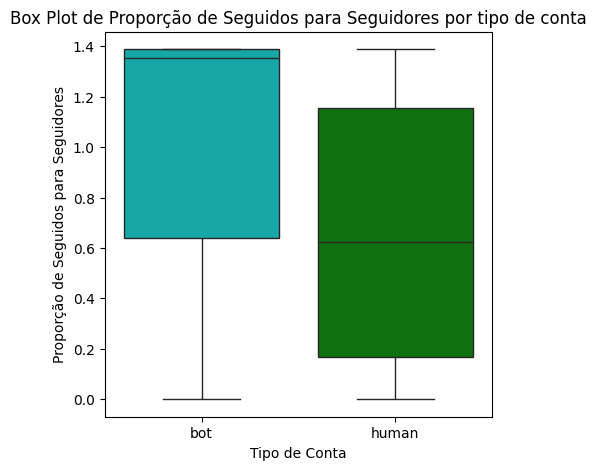

<ipython-input-7-a4bac1da0e60>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='accountType', y='followingToFollowerRatioScore', data=df, inner='quartile', palette={"human": "g", "bot": "c"})


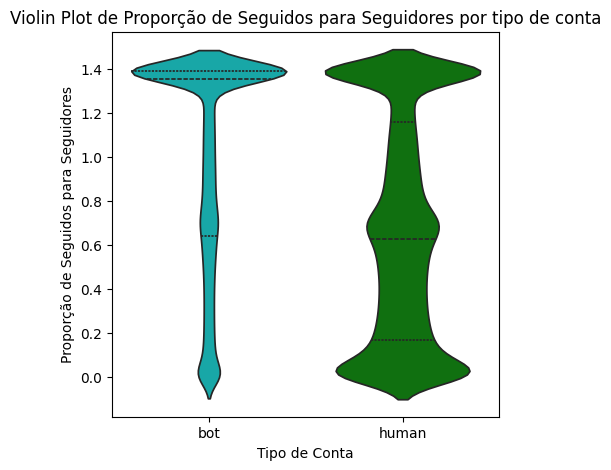

Bots - Proporção de Seguidos para Seguidores:
count    100000.000000
mean          0.999632
std           0.483079
min           0.000000
25%           0.640037
50%           1.353984
75%           1.388292
max           1.388292
Name: followingToFollowerRatioScore, dtype: float64

Humanos - Proporção de Seguidos para Seguidores:
count    100000.000000
mean          0.660476
std           0.503437
min           0.000000
25%           0.167694
50%           0.624856
75%           1.156401
max           1.388292
Name: followingToFollowerRatioScore, dtype: float64


In [ ]:
# kde
plt.figure(figsize=(10, 6))
sns.histplot(df_bot['followingToFollowerRatioScore'], color='blue', kde=True, label='Bots', bins=50)
sns.histplot(df_human['followingToFollowerRatioScore'], color='green', kde=True, label='Humanos', bins=50)
plt.xlabel('Proporção de Seguidos para Seguidores')
plt.ylabel('Densidade')
plt.legend()
plt.title('Distribuição de Proporção de Seguidos para Seguidores')
plt.show()

#histograma bot
plt.figure(figsize=(10, 6))
sns.histplot(df_bot['followingToFollowerRatioScore'], color='blue', kde=True, label='Bots', bins=50)
plt.xlabel('Proporção de Seguidos para Seguidores')
plt.ylabel('Densidade')
plt.legend()
plt.title('Bots - Distribuição de Proporção de Seguidos para Seguidores')
plt.show()

#histograma human
plt.figure(figsize=(10, 6))
sns.histplot(df_human['followingToFollowerRatioScore'], color='green', kde=True, label='Humanos', bins=50)
plt.xlabel('Proporção de Seguidos para Seguidores')
plt.ylabel('Densidade')
plt.legend()
plt.title('Humanos - Proporção de Seguidos para Seguidores')
plt.show()

# boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='accountType', y='followingToFollowerRatioScore', data=df, palette={"human": "g", "bot": "c"})
plt.xlabel('Tipo de Conta')
plt.ylabel('Proporção de Seguidos para Seguidores')
plt.title('Box Plot de Proporção de Seguidos para Seguidores por tipo de conta')
plt.show()

# violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='accountType', y='followingToFollowerRatioScore', data=df, inner='quartile', palette={"human": "g", "bot": "c"})
plt.xlabel('Tipo de Conta')
plt.ylabel('Proporção de Seguidos para Seguidores')
plt.title('Violin Plot de Proporção de Seguidos para Seguidores por tipo de conta')
plt.show()


print("Bots - Proporção de Seguidos para Seguidores:")
print(df_bot['followingToFollowerRatioScore'].describe())
print("\nHumanos - Proporção de Seguidos para Seguidores:")
print(df_human['followingToFollowerRatioScore'].describe())



---



#### **REGRA #2 - PROPORÇÃO DE RETWEETS PARA TWEETS**


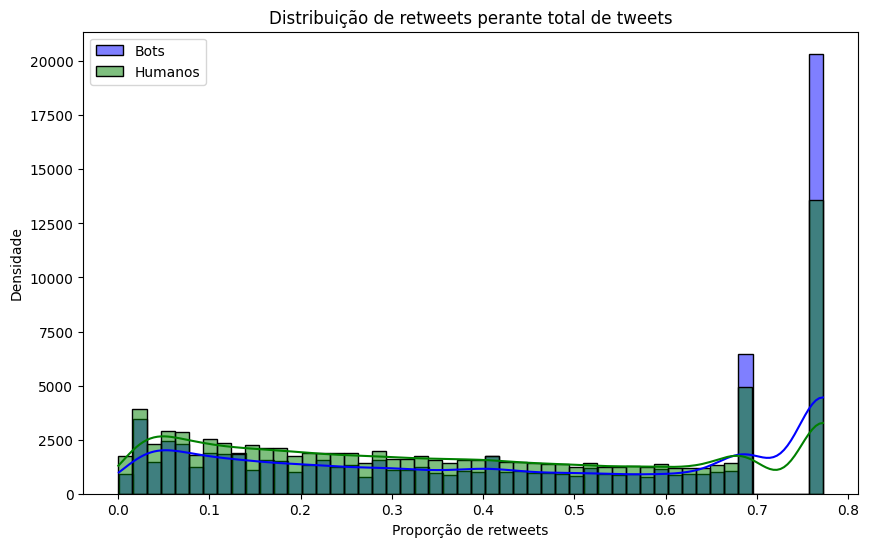

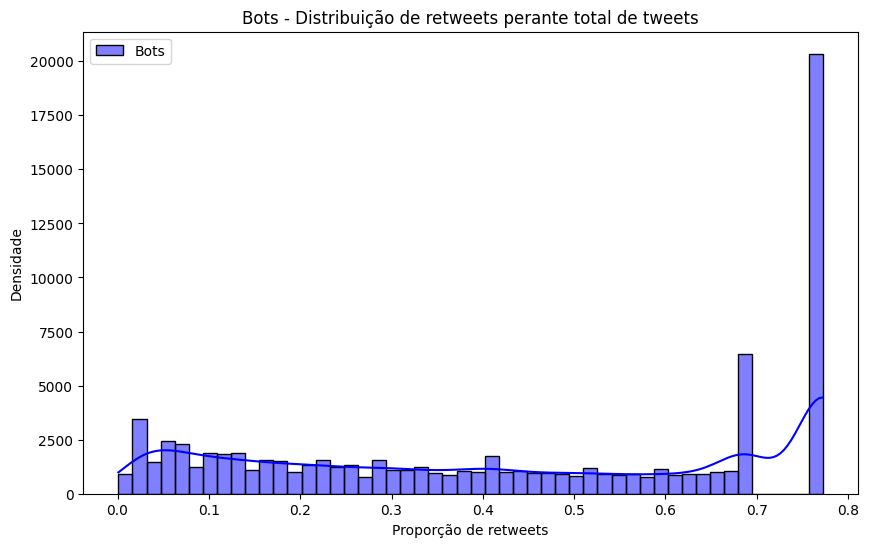

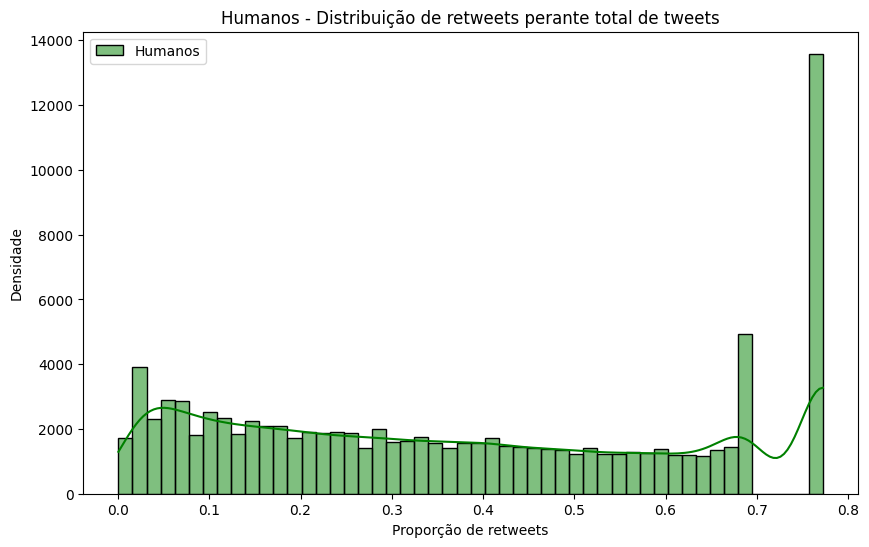

<ipython-input-35-20d20645df24>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='accountType', y='retweetToTweetRatioScore', data=df, palette={"human": "g", "bot": "c"})


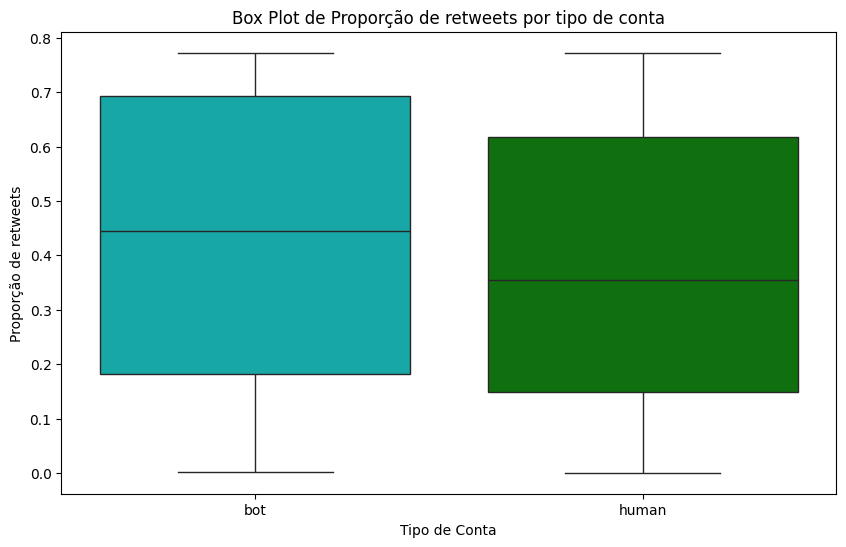

<ipython-input-35-20d20645df24>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='accountType', y='retweetToTweetRatioScore', data=df, inner='quartile', palette={"human": "g", "bot": "c"})


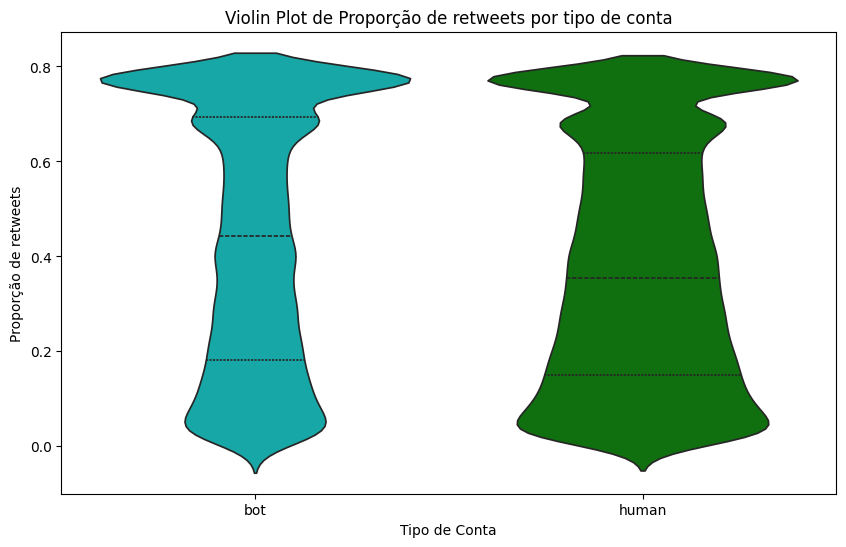

Bots - Proporção de retweets:
count    82429.000000
mean         0.440509
std          0.272224
min          0.000925
25%          0.182322
50%          0.443931
75%          0.693147
max          0.772420
Name: retweetToTweetRatioScore, dtype: float64

Humanos - Proporção de retweets:
count    95065.000000
mean         0.381256
std          0.253853
min          0.000395
25%          0.149532
50%          0.354172
75%          0.617161
max          0.772420
Name: retweetToTweetRatioScore, dtype: float64


In [ ]:
# histograma kde
plt.figure(figsize=(10, 6))
sns.histplot(df_bot['retweetToTweetRatioScore'], color='blue', kde=True, label='Bots', bins=50)
sns.histplot(df_human['retweetToTweetRatioScore'], color='green', kde=True, label='Humanos', bins=50)
plt.xlabel('Proporção de retweets')
plt.ylabel('Densidade')
plt.legend()
plt.title('Distribuição de retweets perante total de tweets')
plt.show()

#histograma bot
plt.figure(figsize=(10, 6))
sns.histplot(df_bot['retweetToTweetRatioScore'], color='blue', kde=True, label='Bots', bins=50)
plt.xlabel('Proporção de retweets')
plt.ylabel('Densidade')
plt.legend()
plt.title('Bots - Distribuição de retweets perante total de tweets')
plt.show()

#histograma human
plt.figure(figsize=(10, 6))
sns.histplot(df_human['retweetToTweetRatioScore'], color='green', kde=True, label='Humanos', bins=50)
plt.xlabel('Proporção de retweets')
plt.ylabel('Densidade')
plt.legend()
plt.title('Humanos - Distribuição de retweets perante total de tweets')
plt.show()

# boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='accountType', y='retweetToTweetRatioScore', data=df, palette={"human": "g", "bot": "c"})
plt.xlabel('Tipo de Conta')
plt.ylabel('Proporção de retweets')
plt.title('Box Plot de Proporção de retweets por tipo de conta')
plt.show()

# violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='accountType', y='retweetToTweetRatioScore', data=df, inner='quartile', palette={"human": "g", "bot": "c"})
plt.xlabel('Tipo de Conta')
plt.ylabel('Proporção de retweets')
plt.title('Violin Plot de Proporção de retweets por tipo de conta')
plt.show()


print("Bots - Proporção de retweets:")
print(df_bot['retweetToTweetRatioScore'].describe())
print("\nHumanos - Proporção de retweets:")
print(df_human['retweetToTweetRatioScore'].describe())




---

#### **REGRA #3 - PROPORÇÃO DE MENÇÕES UNICAS**

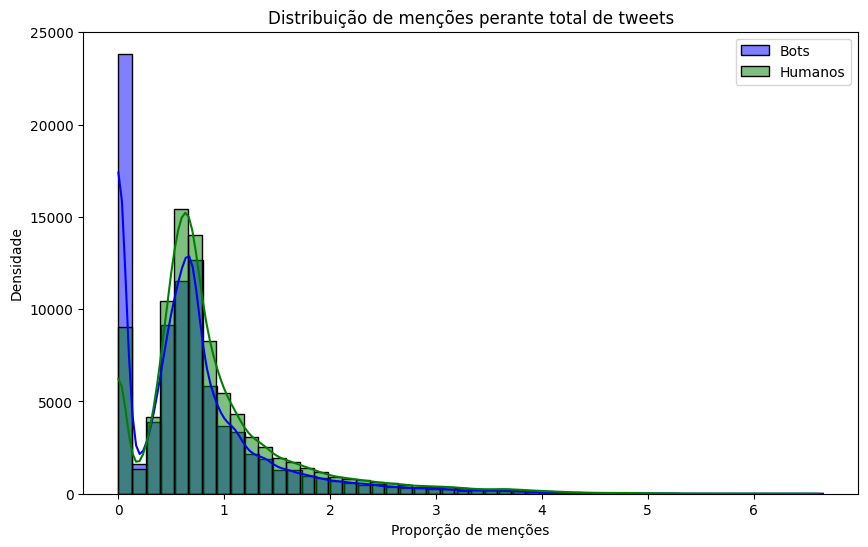

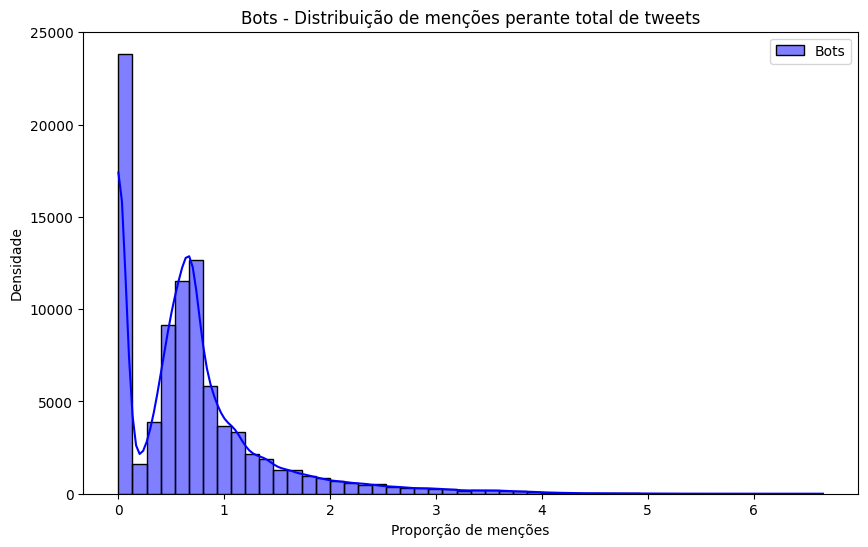

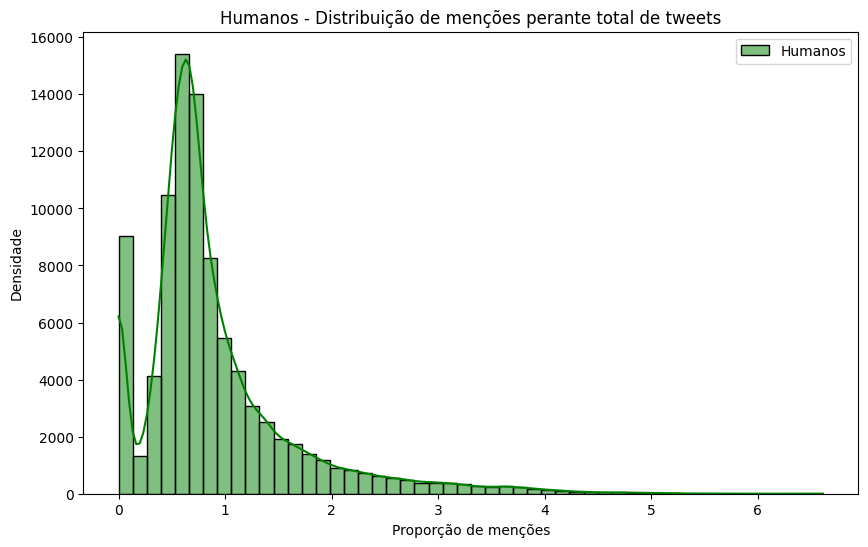

<ipython-input-36-d4b54fc0ac7b>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='accountType', y='mentionsPerUserScore', data=df, palette={"human": "g", "bot": "c"})


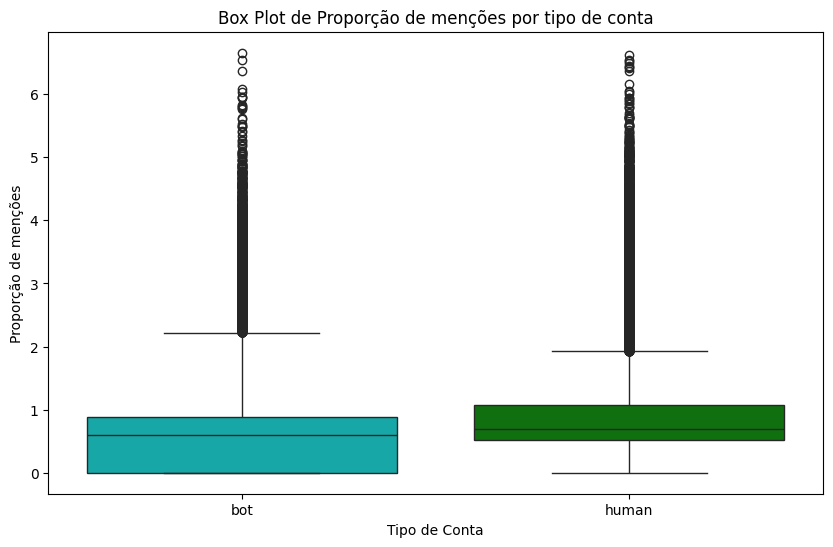

<ipython-input-36-d4b54fc0ac7b>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='accountType', y='mentionsPerUserScore', data=df, inner='quartile', palette={"human": "g", "bot": "c"})


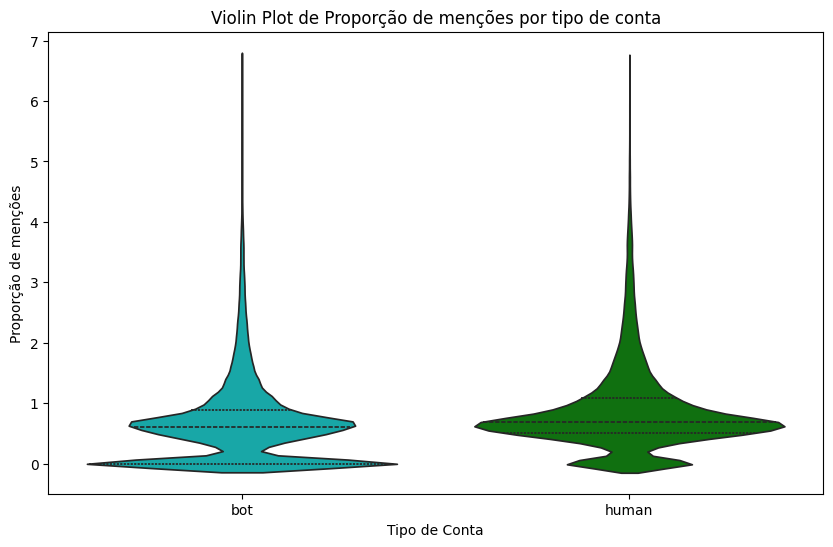

Bots - Proporção de menções:
count    88934.000000
mean         0.685675
std          0.702471
min          0.000000
25%          0.000000
50%          0.600774
75%          0.888168
max          6.655440
Name: mentionsPerUserScore, dtype: float64

Humanos - Proporção de menções:
count    91572.000000
mean         0.895863
std          0.741374
min          0.000000
25%          0.510826
50%          0.693147
75%          1.077559
max          6.614726
Name: mentionsPerUserScore, dtype: float64


In [ ]:
# histograma kde
plt.figure(figsize=(10, 6))
sns.histplot(df_bot['mentionsPerUserScore'], color='blue', kde=True, label='Bots', bins=50)
sns.histplot(df_human['mentionsPerUserScore'], color='green', kde=True, label='Humanos', bins=50)
plt.xlabel('Proporção de menções')
plt.ylabel('Densidade')
plt.legend()
plt.title('Distribuição de menções perante total de tweets')
plt.show()

#histograma bot
plt.figure(figsize=(10, 6))
sns.histplot(df_bot['mentionsPerUserScore'], color='blue', kde=True, label='Bots', bins=50)
plt.xlabel('Proporção de menções')
plt.ylabel('Densidade')
plt.legend()
plt.title('Bots - Distribuição de menções perante total de tweets')
plt.show()

#histograma human
plt.figure(figsize=(10, 6))
sns.histplot(df_human['mentionsPerUserScore'], color='green', kde=True, label='Humanos', bins=50)
plt.xlabel('Proporção de menções')
plt.ylabel('Densidade')
plt.legend()
plt.title('Humanos - Distribuição de menções perante total de tweets')
plt.show()

# boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='accountType', y='mentionsPerUserScore', data=df, palette={"human": "g", "bot": "c"})
plt.xlabel('Tipo de Conta')
plt.ylabel('Proporção de menções')
plt.title('Box Plot de Proporção de menções por tipo de conta')
plt.show()

# violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='accountType', y='mentionsPerUserScore', data=df, inner='quartile', palette={"human": "g", "bot": "c"})
plt.xlabel('Tipo de Conta')
plt.ylabel('Proporção de menções')
plt.title('Violin Plot de Proporção de menções por tipo de conta')
plt.show()


print("Bots - Proporção de menções:")
print(df_bot['mentionsPerUserScore'].describe())
print("\nHumanos - Proporção de menções:")
print(df_human['mentionsPerUserScore'].describe())



---

#### **REGRA #4 - MÉDIA DO TAMANHO DOS TWEETS**

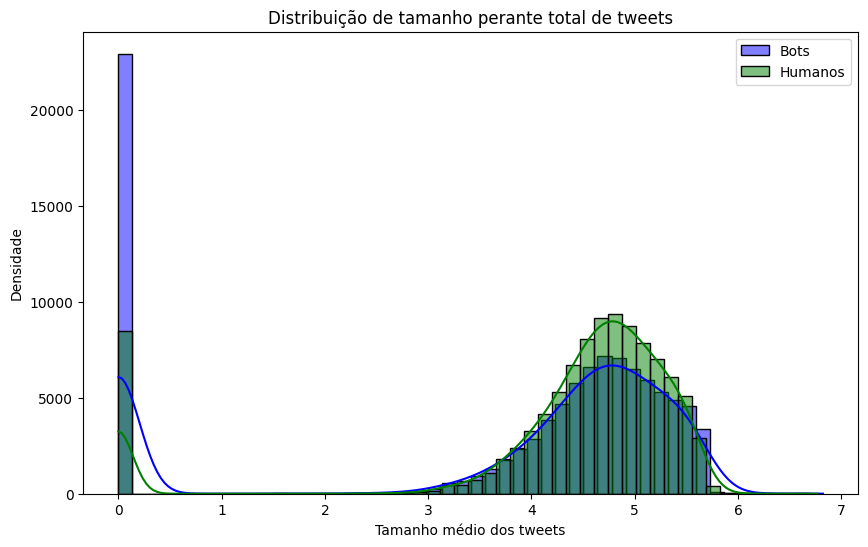

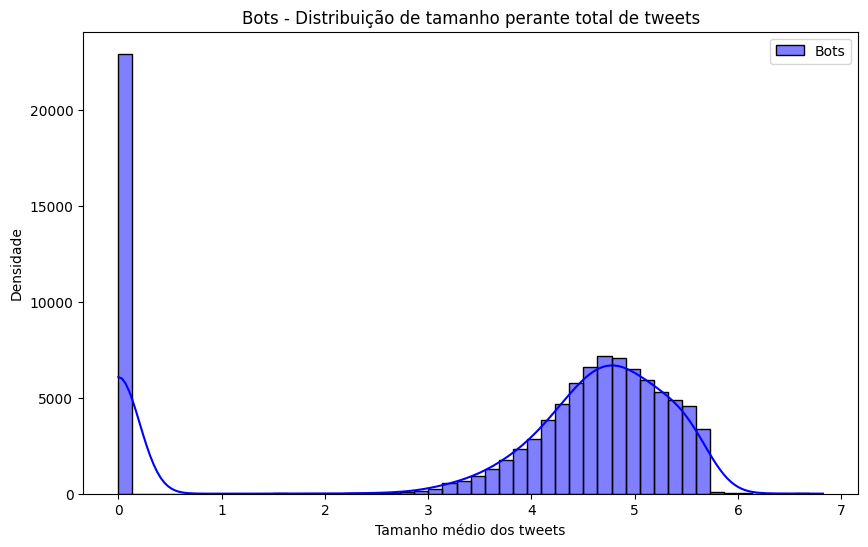

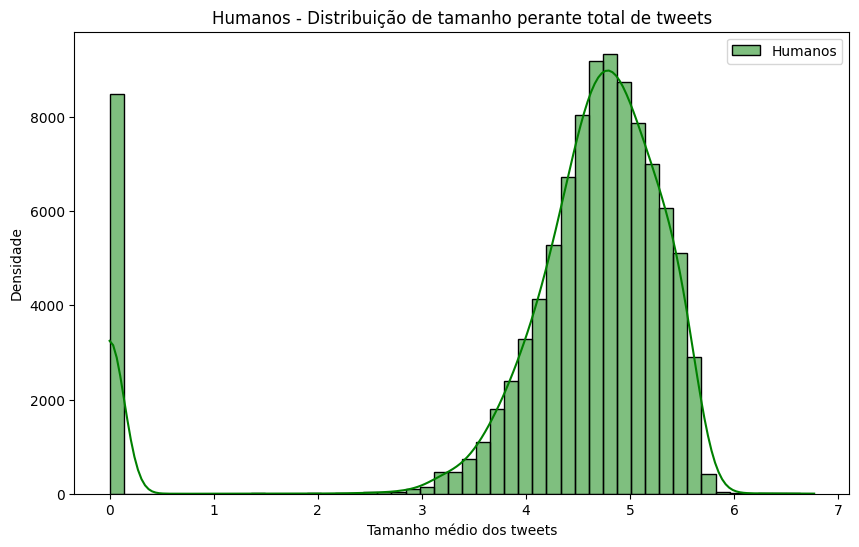

<ipython-input-7-b0a52d210640>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='accountType', y='tweetSizeAvgScore', data=df, palette={"human": "g", "bot": "c"})


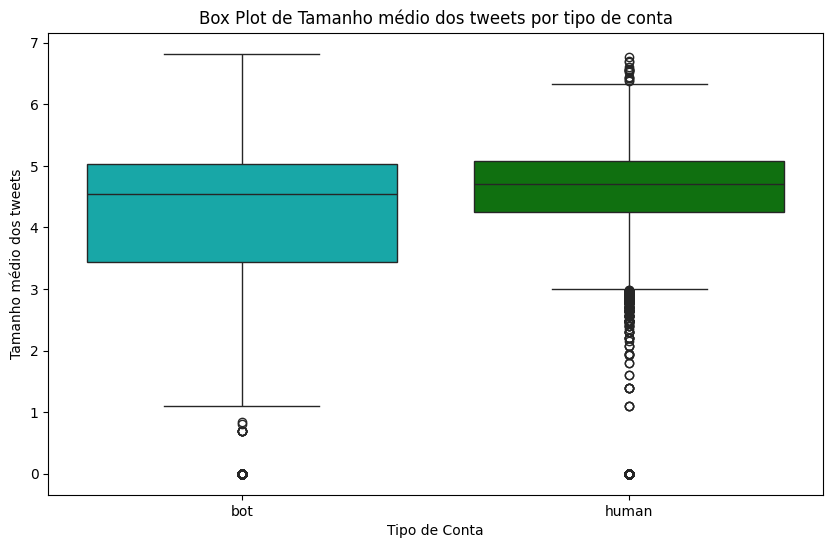

<ipython-input-7-b0a52d210640>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='accountType', y='tweetSizeAvgScore', data=df, inner='quartile', palette={"human": "g", "bot": "c"})


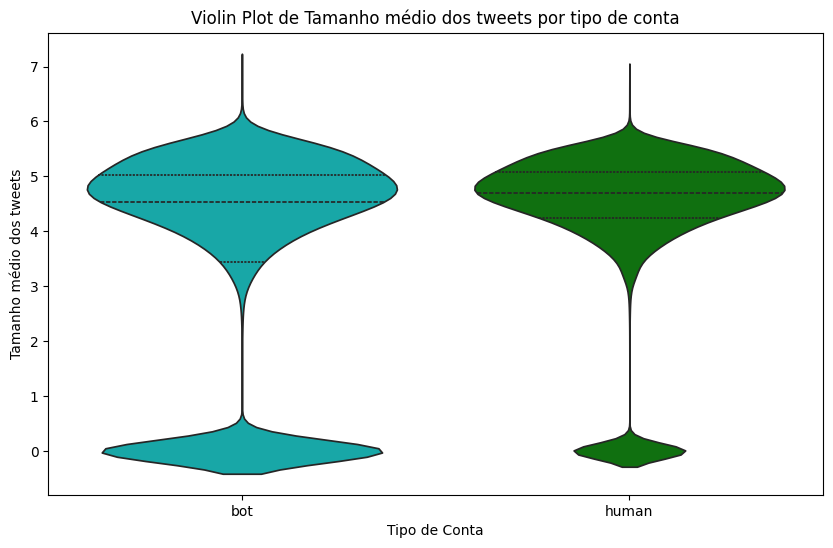

Bots - Tamanho médio dos tweets:
count    100000.000000
mean          3.635139
std           2.051014
min           0.000000
25%           3.433688
50%           4.537197
75%           5.031744
max           6.822586
Name: tweetSizeAvgScore, dtype: float64

Humanos - Tamanho médio dos tweets:
count    100000.000000
mean          4.323612
std           1.413285
min           0.000000
25%           4.247889
50%           4.703277
75%           5.085136
max           6.770216
Name: tweetSizeAvgScore, dtype: float64


In [ ]:
# histograma kde
plt.figure(figsize=(10, 6))
sns.histplot(df_bot['tweetSizeAvgScore'], color='blue', kde=True, label='Bots', bins=50)
sns.histplot(df_human['tweetSizeAvgScore'], color='green', kde=True, label='Humanos', bins=50)
plt.xlabel('Tamanho médio dos tweets')
plt.ylabel('Densidade')
plt.legend()
plt.title('Distribuição de tamanho perante total de tweets')
plt.show()

#histograma bot
plt.figure(figsize=(10, 6))
sns.histplot(df_bot['tweetSizeAvgScore'], color='blue', kde=True, label='Bots', bins=50)
plt.xlabel('Tamanho médio dos tweets')
plt.ylabel('Densidade')
plt.legend()
plt.title('Bots - Distribuição de tamanho perante total de tweets')
plt.show()

#histograma human
plt.figure(figsize=(10, 6))
sns.histplot(df_human['tweetSizeAvgScore'], color='green', kde=True, label='Humanos', bins=50)
plt.xlabel('Tamanho médio dos tweets')
plt.ylabel('Densidade')
plt.legend()
plt.title('Humanos - Distribuição de tamanho perante total de tweets')
plt.show()

# boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='accountType', y='tweetSizeAvgScore', data=df, palette={"human": "g", "bot": "c"})
plt.xlabel('Tipo de Conta')
plt.ylabel('Tamanho médio dos tweets')
plt.title('Box Plot de Tamanho médio dos tweets por tipo de conta')
plt.show()

# violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='accountType', y='tweetSizeAvgScore', data=df, inner='quartile', palette={"human": "g", "bot": "c"})
plt.xlabel('Tipo de Conta')
plt.ylabel('Tamanho médio dos tweets')
plt.title('Violin Plot de Tamanho médio dos tweets por tipo de conta')
plt.show()


print("Bots - Tamanho médio dos tweets:")
print(df_bot['tweetSizeAvgScore'].describe())
print("\nHumanos - Tamanho médio dos tweets:")
print(df_human['tweetSizeAvgScore'].describe())



---
#### **REGRA #5 - IDADE DA CONTA EM DIAS**

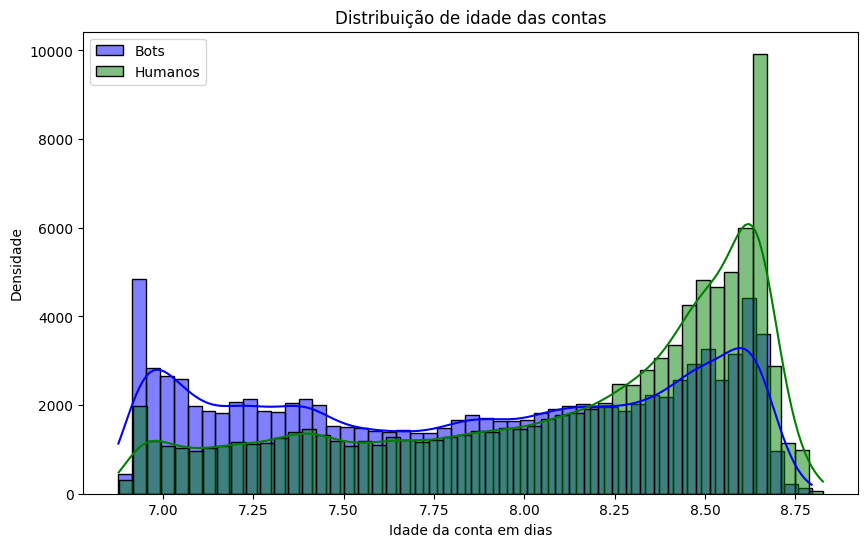

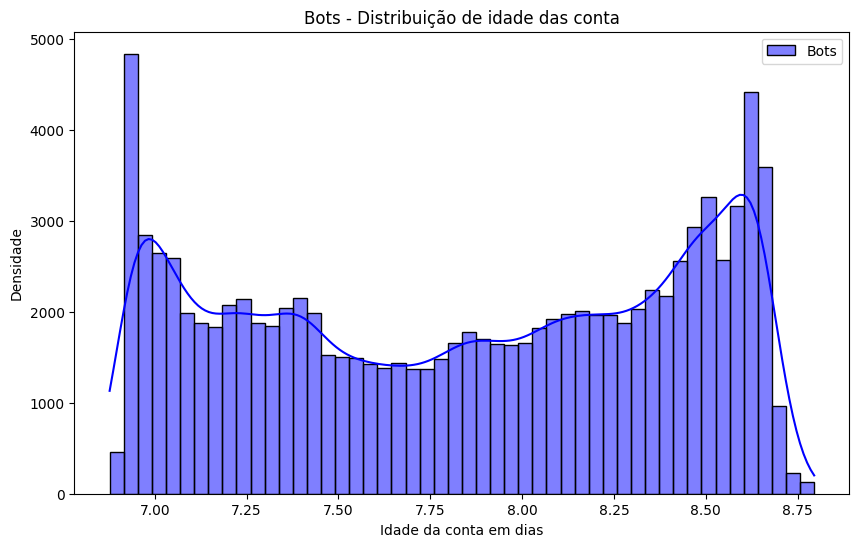

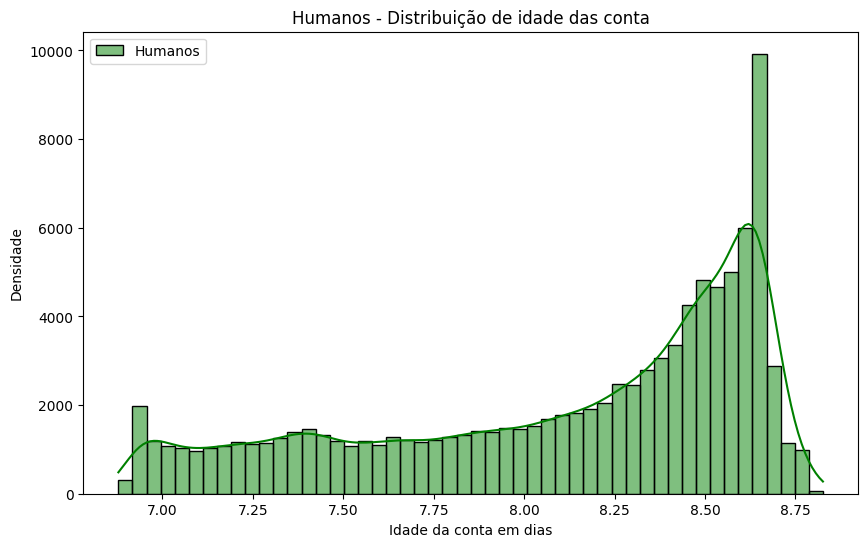

<ipython-input-8-9cb6af95f8c0>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='accountType', y='accountAgeScore', data=df, palette={"human": "g", "bot": "c"})


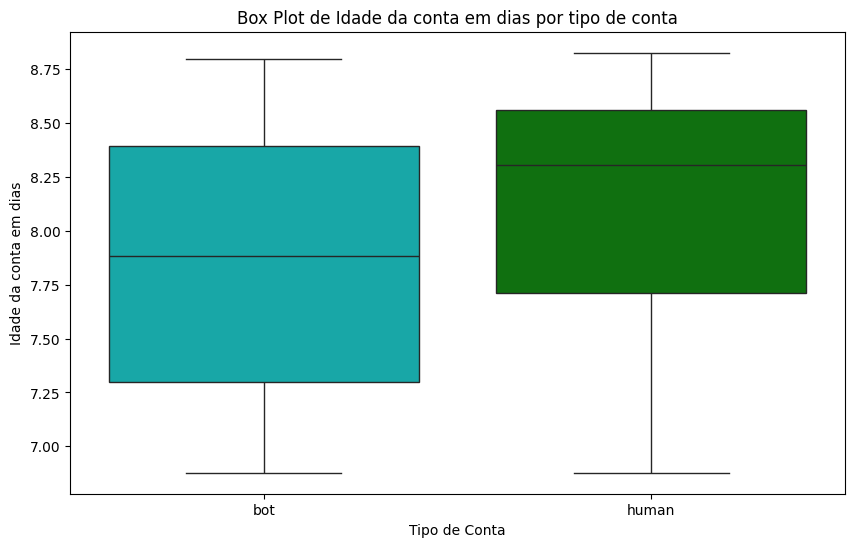

<ipython-input-8-9cb6af95f8c0>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='accountType', y='accountAgeScore', data=df, inner='quartile', palette={"human": "g", "bot": "c"})


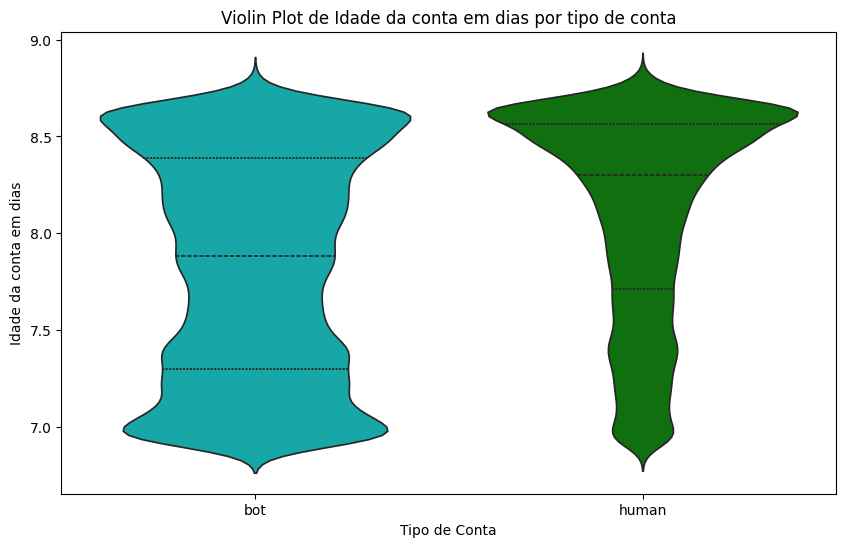

Bots - Idade da conta em dias:
count    100000.000000
mean          7.839024
std           0.578532
min           6.877296
25%           7.296413
50%           7.883823
75%           8.391176
max           8.794825
Name: accountAgeScore, dtype: float64

Humanos - Idade da conta em dias:
count    100000.000000
mean          8.109892
std           0.534351
min           6.878326
25%           7.711101
50%           8.303009
75%           8.562167
max           8.826001
Name: accountAgeScore, dtype: float64


In [ ]:
# histograma kde
plt.figure(figsize=(10, 6))
sns.histplot(df_bot['accountAgeScore'], color='blue', kde=True, label='Bots', bins=50)
sns.histplot(df_human['accountAgeScore'], color='green', kde=True, label='Humanos', bins=50)
plt.xlabel('Idade da conta em dias')
plt.ylabel('Densidade')
plt.legend()
plt.title('Distribuição de idade das contas')
plt.show()

#histograma bot
plt.figure(figsize=(10, 6))
sns.histplot(df_bot['accountAgeScore'], color='blue', kde=True, label='Bots', bins=50)
plt.xlabel('Idade da conta em dias')
plt.ylabel('Densidade')
plt.legend()
plt.title('Bots - Distribuição de idade das conta')
plt.show()

#histograma human
plt.figure(figsize=(10, 6))
sns.histplot(df_human['accountAgeScore'], color='green', kde=True, label='Humanos', bins=50)
plt.xlabel('Idade da conta em dias')
plt.ylabel('Densidade')
plt.legend()
plt.title('Humanos - Distribuição de idade das conta')
plt.show()

# boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='accountType', y='accountAgeScore', data=df, palette={"human": "g", "bot": "c"})
plt.xlabel('Tipo de Conta')
plt.ylabel('Idade da conta em dias')
plt.title('Box Plot de Idade da conta em dias por tipo de conta')
plt.show()

# violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='accountType', y='accountAgeScore', data=df, inner='quartile', palette={"human": "g", "bot": "c"})
plt.xlabel('Tipo de Conta')
plt.ylabel('Idade da conta em dias')
plt.title('Violin Plot de Idade da conta em dias por tipo de conta')
plt.show()


print("Bots - Idade da conta em dias:")
print(df_bot['accountAgeScore'].describe())
print("\nHumanos - Idade da conta em dias:")
print(df_human['accountAgeScore'].describe())



---

#### **REGRA #6 - PROPORÇÃO DE HASHTAGS UNICAS**

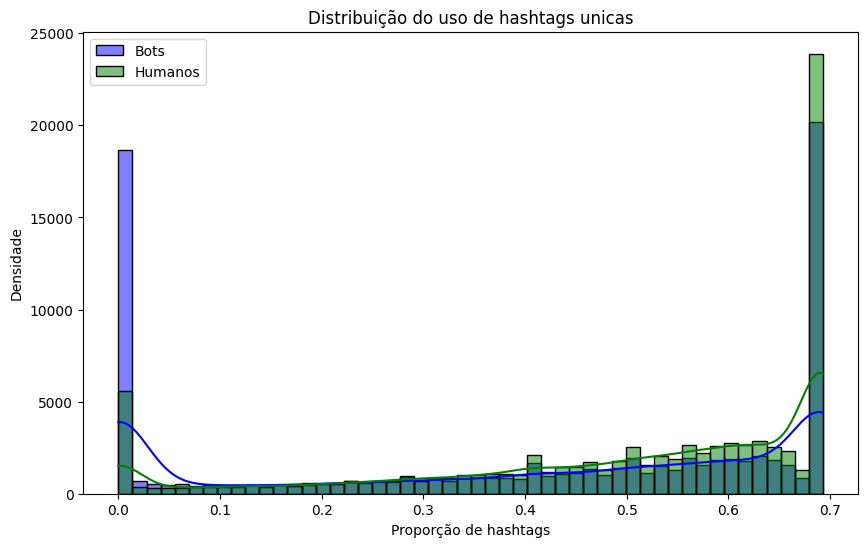

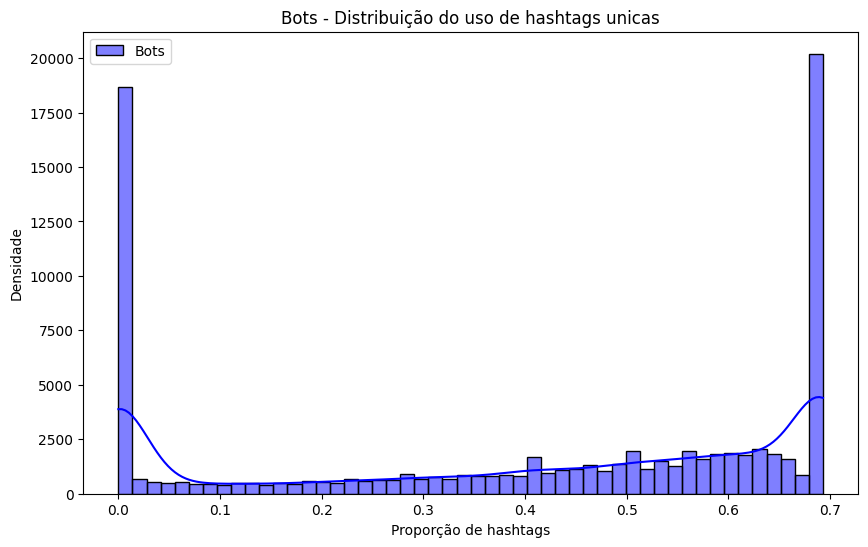

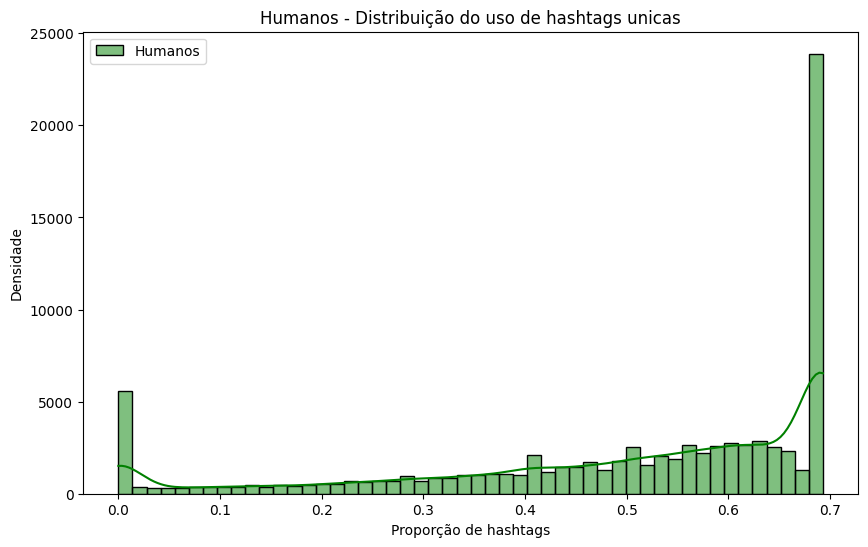

<ipython-input-39-e17422df4803>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='accountType', y='hashtagUsageScore', data=df, palette={"human": "g", "bot": "c"})


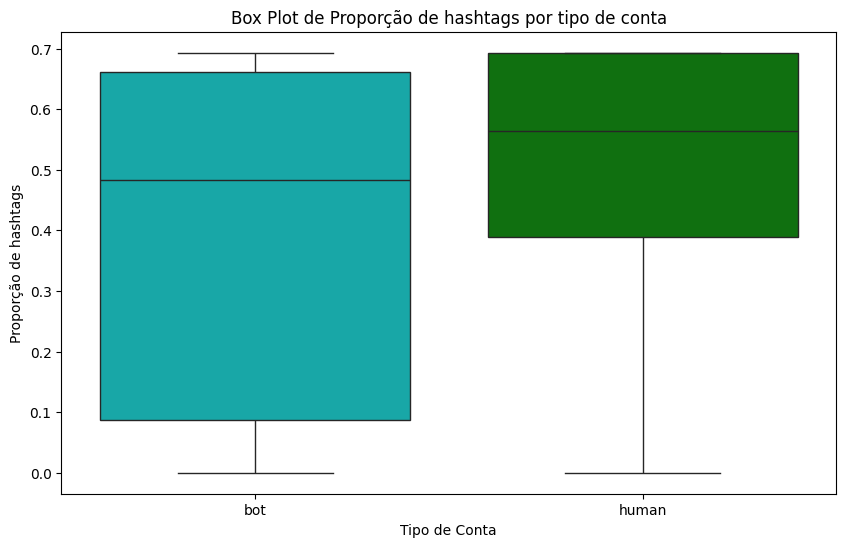

<ipython-input-39-e17422df4803>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='accountType', y='hashtagUsageScore', data=df, inner='quartile', palette={"human": "g", "bot": "c"})


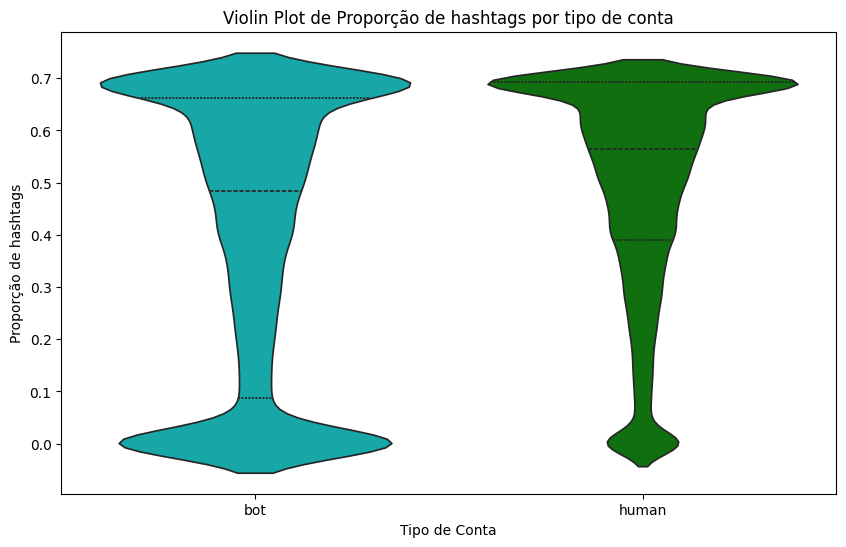

Bots - Proporção de hashtags:
count    85768.000000
mean         0.399462
std          0.270613
min          0.000000
25%          0.086598
50%          0.483174
75%          0.661398
max          0.693147
Name: hashtagUsageScore, dtype: float64

Humanos - Proporção de hashtags:
count    87421.000000
mean         0.496874
std          0.210680
min          0.000000
25%          0.389465
50%          0.563935
75%          0.693147
max          0.693147
Name: hashtagUsageScore, dtype: float64


In [ ]:
# histograma kde
plt.figure(figsize=(10, 6))
sns.histplot(df_bot['hashtagUsageScore'], color='blue', kde=True, label='Bots', bins=50)
sns.histplot(df_human['hashtagUsageScore'], color='green', kde=True, label='Humanos', bins=50)
plt.xlabel('Proporção de hashtags')
plt.ylabel('Densidade')
plt.legend()
plt.title('Distribuição do uso de hashtags unicas')
plt.show()

#histograma bot
plt.figure(figsize=(10, 6))
sns.histplot(df_bot['hashtagUsageScore'], color='blue', kde=True, label='Bots', bins=50)
plt.xlabel('Proporção de hashtags')
plt.ylabel('Densidade')
plt.legend()
plt.title('Bots - Distribuição do uso de hashtags unicas')
plt.show()

#histograma human
plt.figure(figsize=(10, 6))
sns.histplot(df_human['hashtagUsageScore'], color='green', kde=True, label='Humanos', bins=50)
plt.xlabel('Proporção de hashtags')
plt.ylabel('Densidade')
plt.legend()
plt.title('Humanos - Distribuição do uso de hashtags unicas')
plt.show()

# boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='accountType', y='hashtagUsageScore', data=df, palette={"human": "g", "bot": "c"})
plt.xlabel('Tipo de Conta')
plt.ylabel('Proporção de hashtags')
plt.title('Box Plot de Proporção de hashtags por tipo de conta')
plt.show()

# violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='accountType', y='hashtagUsageScore', data=df, inner='quartile', palette={"human": "g", "bot": "c"})
plt.xlabel('Tipo de Conta')
plt.ylabel('Proporção de hashtags')
plt.title('Violin Plot de Proporção de hashtags por tipo de conta')
plt.show()


print("Bots - Proporção de hashtags:")
print(df_bot['hashtagUsageScore'].describe())
print("\nHumanos - Proporção de hashtags:")
print(df_human['hashtagUsageScore'].describe())



---

#### **REGRA #7 - QUANTIDADE DE TWEETS EM RELAÇÃO A IDADE DA CONTA**

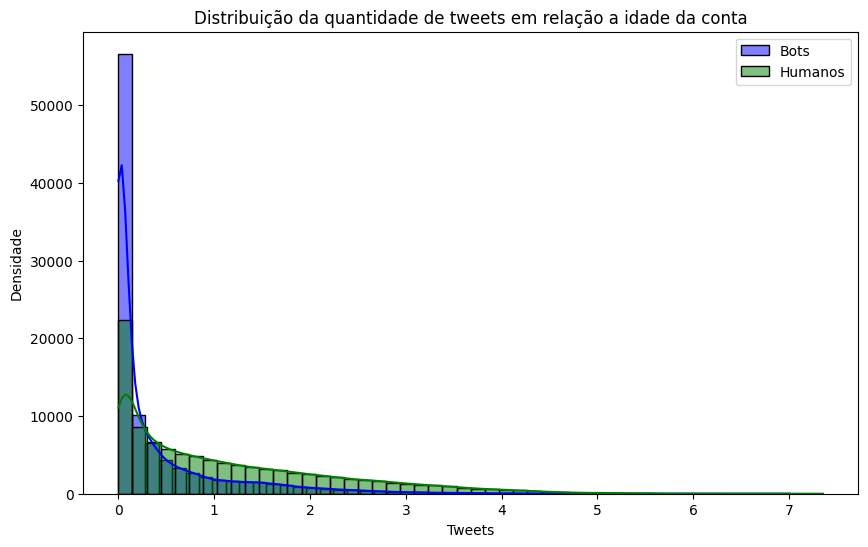

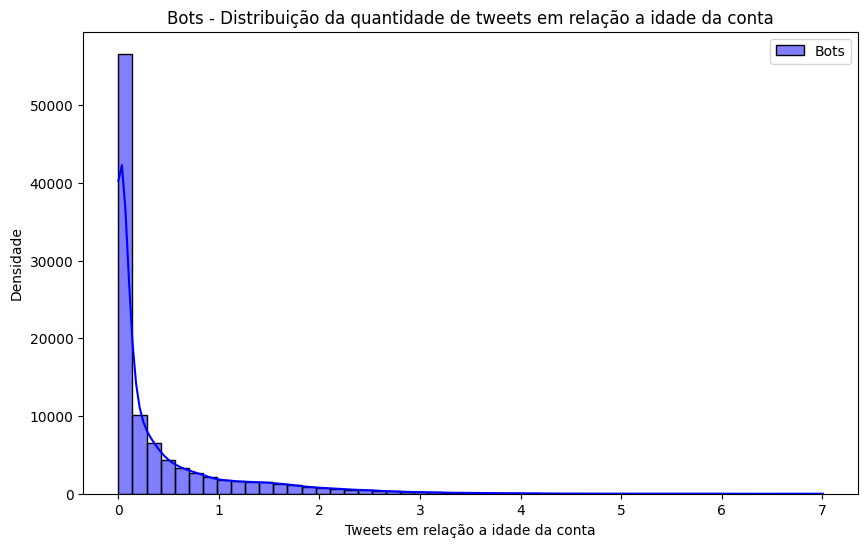

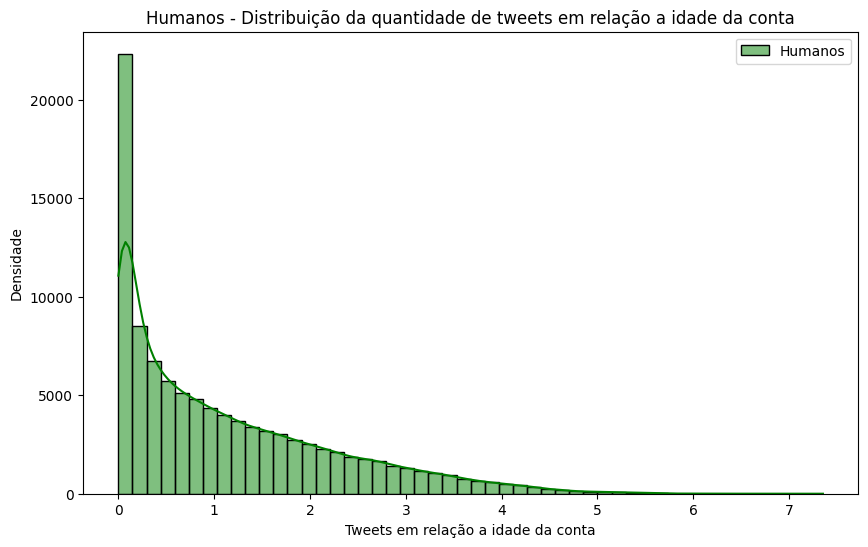

<ipython-input-9-a7a0e7b03a05>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='accountType', y='tweetCountToAccountAgeScore', data=df, palette={"human": "g", "bot": "c"})


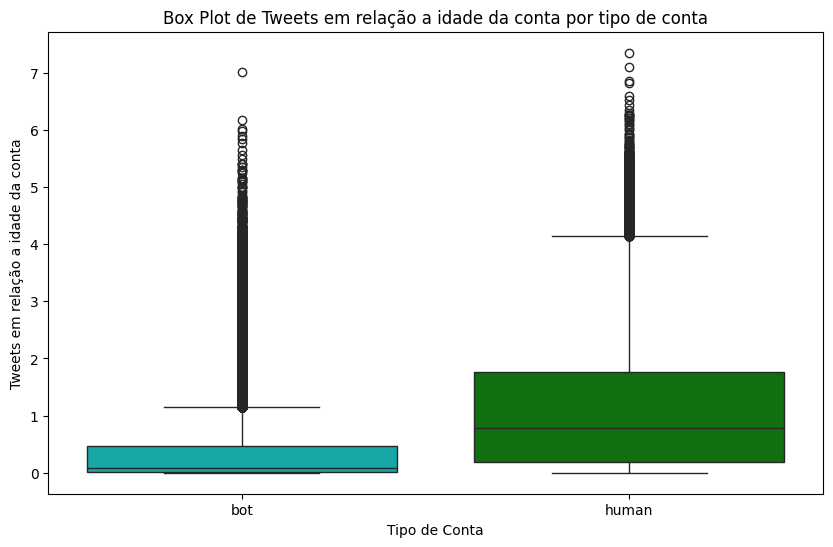

<ipython-input-9-a7a0e7b03a05>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='accountType', y='tweetCountToAccountAgeScore', data=df, inner='quartile', palette={"human": "g", "bot": "c"})


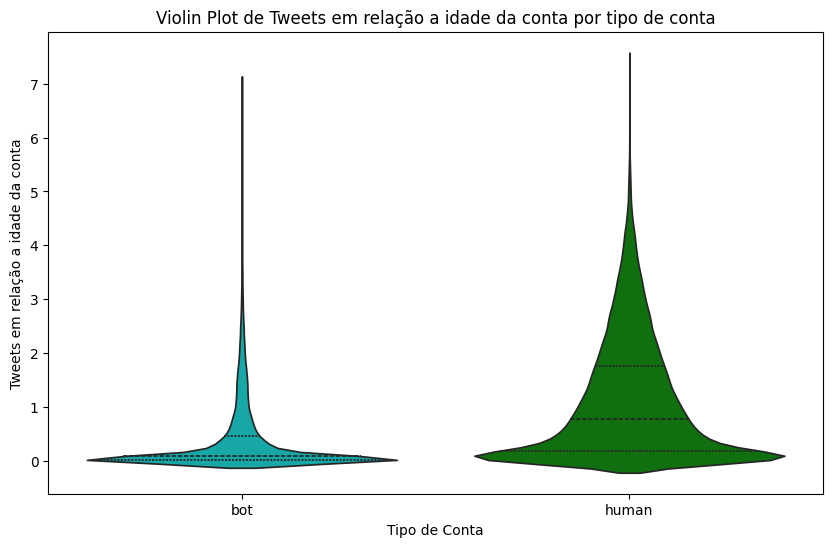

Bots - Tweets em relação a idade da conta:
count    99655.000000
mean         0.393211
std          0.659955
min          0.000000
25%          0.008401
50%          0.085667
75%          0.462056
max          7.007428
Name: tweetCountToAccountAgeScore, dtype: float64

Humanos - Tweets em relação a idade da conta:
count    99859.000000
mean         1.125139
std          1.118430
min          0.000000
25%          0.186626
50%          0.780024
75%          1.767224
max          7.352955
Name: tweetCountToAccountAgeScore, dtype: float64


In [ ]:
# histograma kde
plt.figure(figsize=(10, 6))
sns.histplot(df_bot['tweetCountToAccountAgeScore'], color='blue', kde=True, label='Bots', bins=50)
sns.histplot(df_human['tweetCountToAccountAgeScore'], color='green', kde=True, label='Humanos', bins=50)
plt.xlabel('Tweets')
plt.ylabel('Densidade')
plt.legend()
plt.title('Distribuição da quantidade de tweets em relação a idade da conta')
plt.show()

#histograma bot
plt.figure(figsize=(10, 6))
sns.histplot(df_bot['tweetCountToAccountAgeScore'], color='blue', kde=True, label='Bots', bins=50)
plt.xlabel('Tweets em relação a idade da conta')
plt.ylabel('Densidade')
plt.legend()
plt.title('Bots - Distribuição da quantidade de tweets em relação a idade da conta')
plt.show()

#histograma human
plt.figure(figsize=(10, 6))
sns.histplot(df_human['tweetCountToAccountAgeScore'], color='green', kde=True, label='Humanos', bins=50)
plt.xlabel('Tweets em relação a idade da conta')
plt.ylabel('Densidade')
plt.legend()
plt.title('Humanos - Distribuição da quantidade de tweets em relação a idade da conta')
plt.show()

# boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='accountType', y='tweetCountToAccountAgeScore', data=df, palette={"human": "g", "bot": "c"})
plt.xlabel('Tipo de Conta')
plt.ylabel('Tweets em relação a idade da conta')
plt.title('Box Plot de Tweets em relação a idade da conta por tipo de conta')
plt.show()

# violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='accountType', y='tweetCountToAccountAgeScore', data=df, inner='quartile', palette={"human": "g", "bot": "c"})
plt.xlabel('Tipo de Conta')
plt.ylabel('Tweets em relação a idade da conta')
plt.title('Violin Plot de Tweets em relação a idade da conta por tipo de conta')
plt.show()


print("Bots - Tweets em relação a idade da conta:")
print(df_bot['tweetCountToAccountAgeScore'].describe())
print("\nHumanos - Tweets em relação a idade da conta:")
print(df_human['tweetCountToAccountAgeScore'].describe())



---

####**REGRA #8 - MEDIA DE TEMPO ENTRE OS TWEETS**

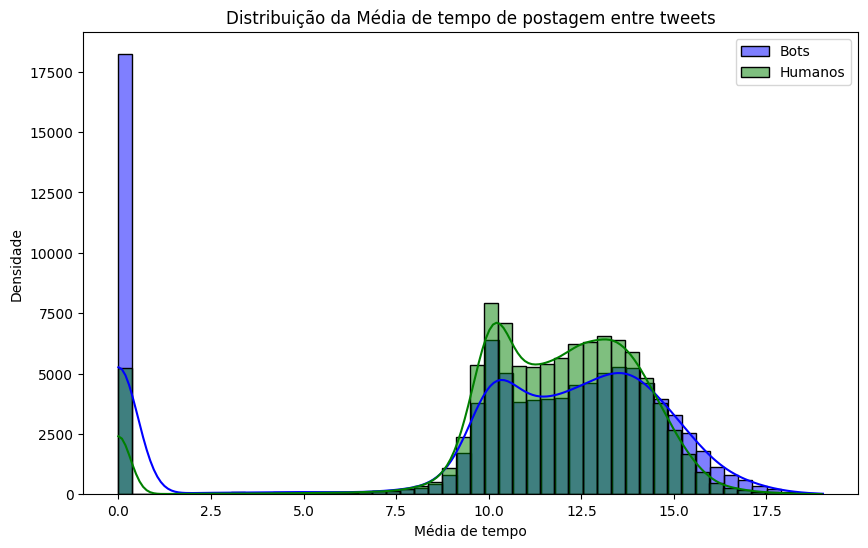

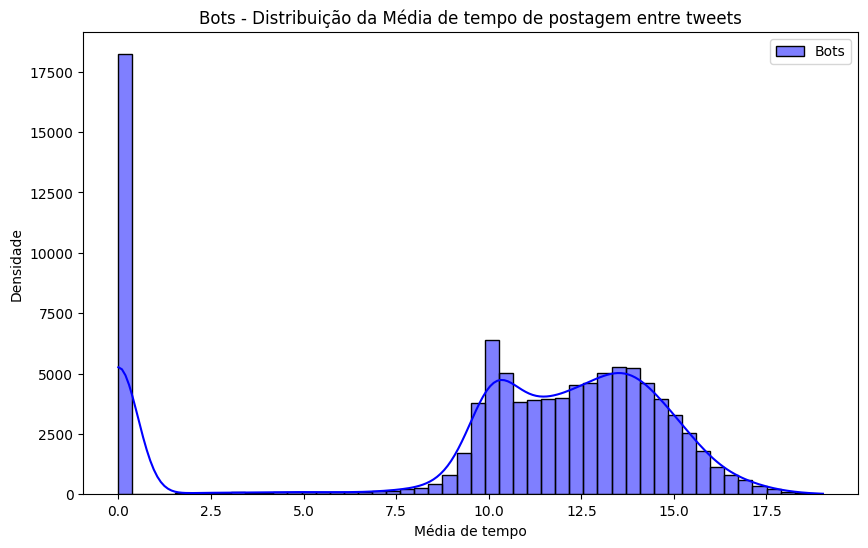

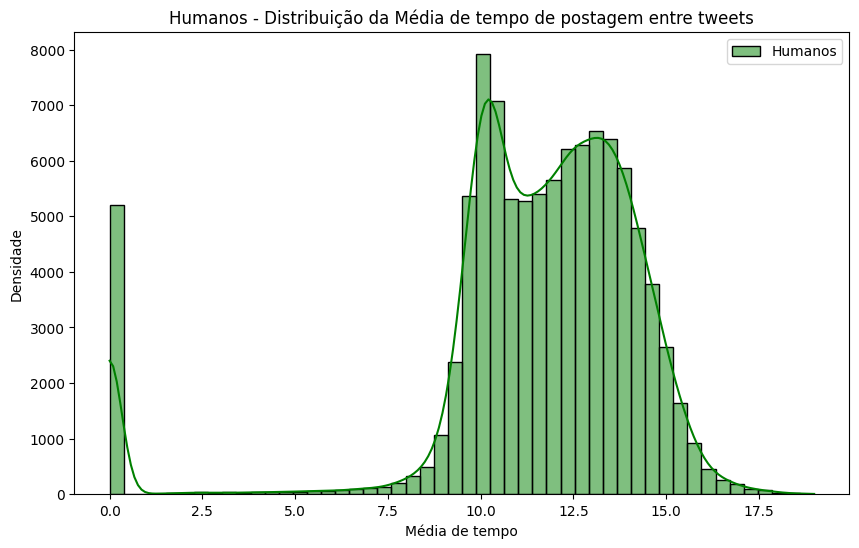

<ipython-input-41-13ee2f62ebca>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='accountType', y='avgTimeBetweenPostsScore', data=df, palette={"human": "g", "bot": "c"})


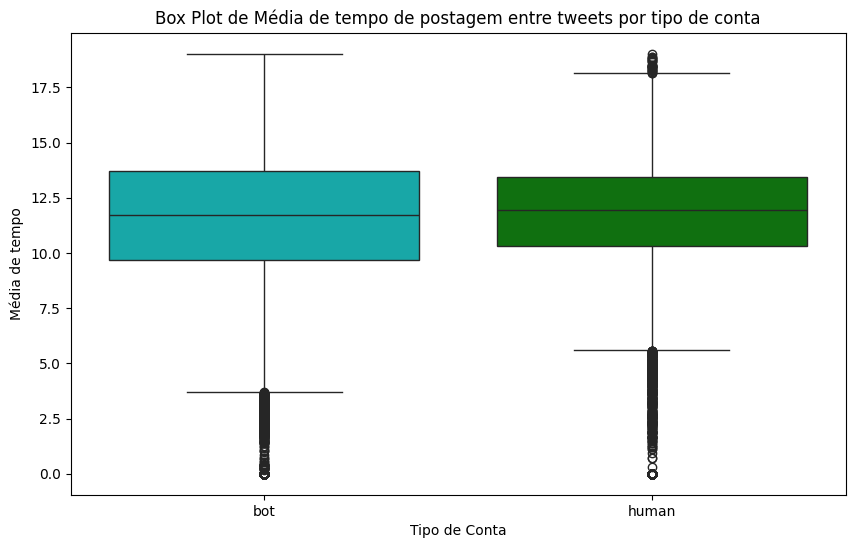

<ipython-input-41-13ee2f62ebca>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='accountType', y='avgTimeBetweenPostsScore', data=df, inner='quartile', palette={"human": "g", "bot": "c"})


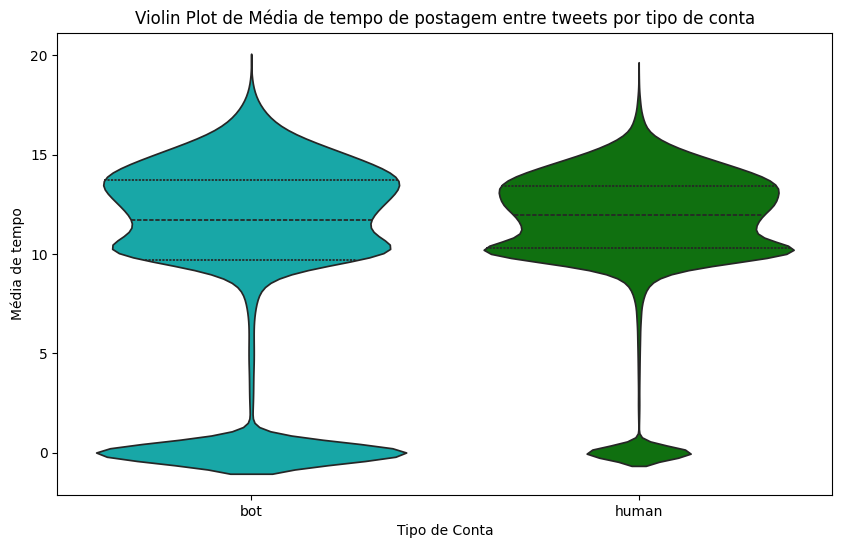

Bots - Média de tempo de postagem entre tweets:
count    97873.000000
mean        10.101084
std          5.239347
min          0.000000
25%          9.702220
50%         11.710575
75%         13.710503
max         19.023572
Name: avgTimeBetweenPostsScore, dtype: float64

Humanos - Média de tempo de postagem entre tweets:
count    98763.000000
mean        11.431414
std          3.279049
min          0.000000
25%         10.294812
50%         11.939772
75%         13.436730
max         18.989995
Name: avgTimeBetweenPostsScore, dtype: float64


In [ ]:
# histograma kde
plt.figure(figsize=(10, 6))
sns.histplot(df_bot['avgTimeBetweenPostsScore'], color='blue', kde=True, label='Bots', bins=50)
sns.histplot(df_human['avgTimeBetweenPostsScore'], color='green', kde=True, label='Humanos', bins=50)
plt.xlabel('Média de tempo')
plt.ylabel('Densidade')
plt.legend()
plt.title('Distribuição da Média de tempo de postagem entre tweets')
plt.show()

#histograma bot
plt.figure(figsize=(10, 6))
sns.histplot(df_bot['avgTimeBetweenPostsScore'], color='blue', kde=True, label='Bots', bins=50)
plt.xlabel('Média de tempo')
plt.ylabel('Densidade')
plt.legend()
plt.title('Bots - Distribuição da Média de tempo de postagem entre tweets')
plt.show()

#histograma human
plt.figure(figsize=(10, 6))
sns.histplot(df_human['avgTimeBetweenPostsScore'], color='green', kde=True, label='Humanos', bins=50)
plt.xlabel('Média de tempo')
plt.ylabel('Densidade')
plt.legend()
plt.title('Humanos - Distribuição da Média de tempo de postagem entre tweets')
plt.show()

# boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='accountType', y='avgTimeBetweenPostsScore', data=df, palette={"human": "g", "bot": "c"})
plt.xlabel('Tipo de Conta')
plt.ylabel('Média de tempo')
plt.title('Box Plot de Média de tempo de postagem entre tweets por tipo de conta')
plt.show()

# violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='accountType', y='avgTimeBetweenPostsScore', data=df, inner='quartile', palette={"human": "g", "bot": "c"})
plt.xlabel('Tipo de Conta')
plt.ylabel('Média de tempo')
plt.title('Violin Plot de Média de tempo de postagem entre tweets por tipo de conta')
plt.show()


print("Bots - Média de tempo de postagem entre tweets:")
print(df_bot['avgTimeBetweenPostsScore'].describe())
print("\nHumanos - Média de tempo de postagem entre tweets:")
print(df_human['avgTimeBetweenPostsScore'].describe())



---

####**REGRA #9 - SIMILARIDADE ENTRE NOME E USERNAME**

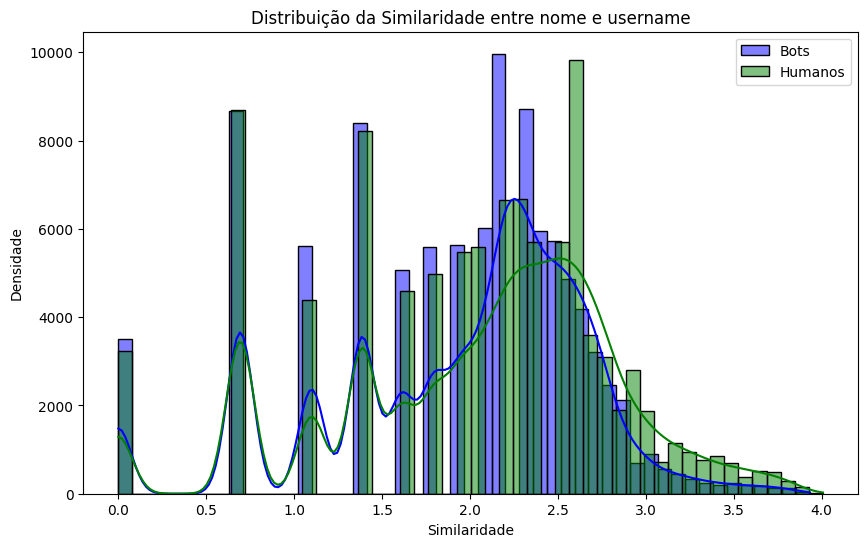

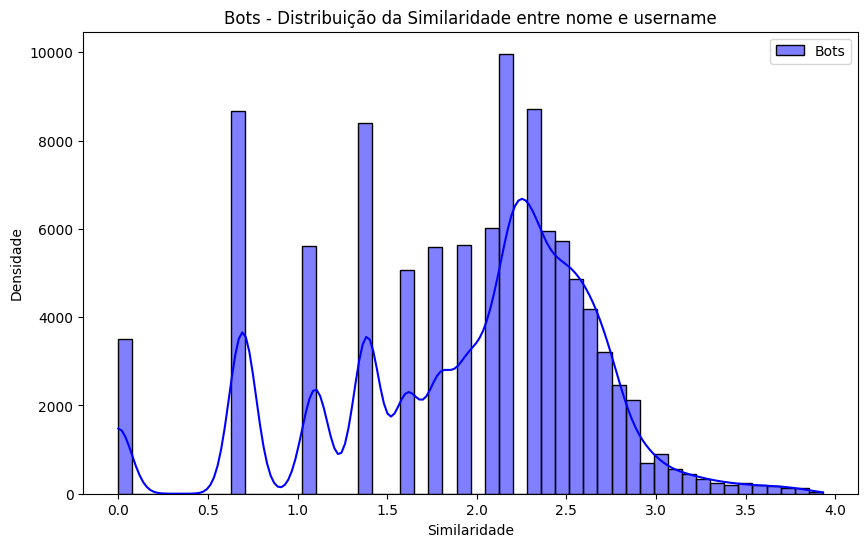

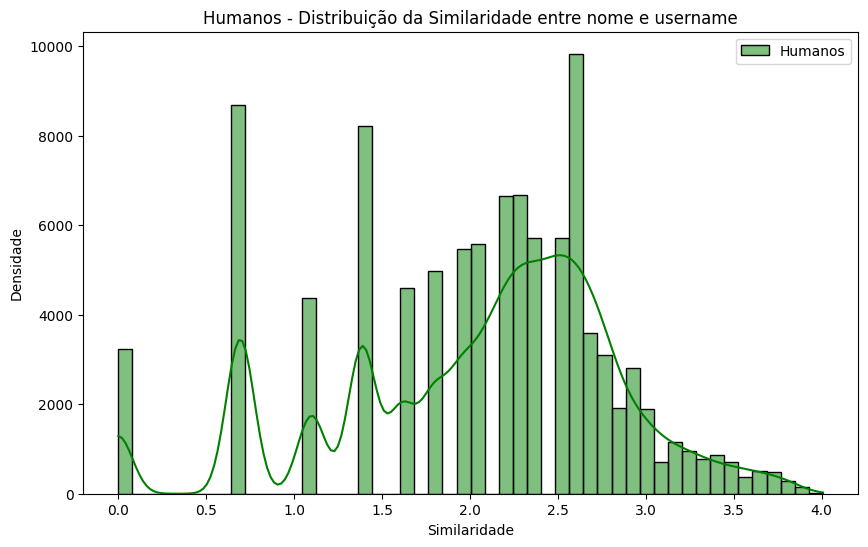

<ipython-input-42-cb4fb8c5b852>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='accountType', y='similarityBetweenNameAndUsernameScore', data=df, palette={"human": "g", "bot": "c"})


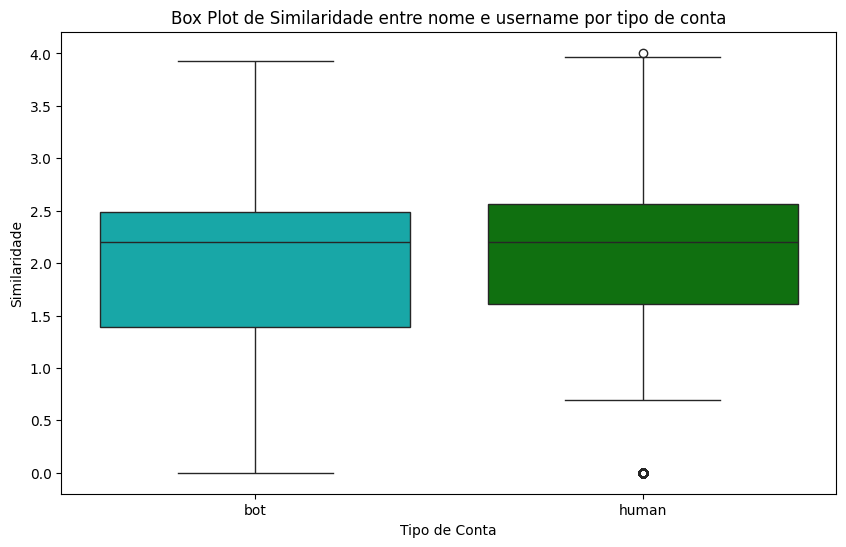

<ipython-input-42-cb4fb8c5b852>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='accountType', y='similarityBetweenNameAndUsernameScore', data=df, inner='quartile', palette={"human": "g", "bot": "c"})


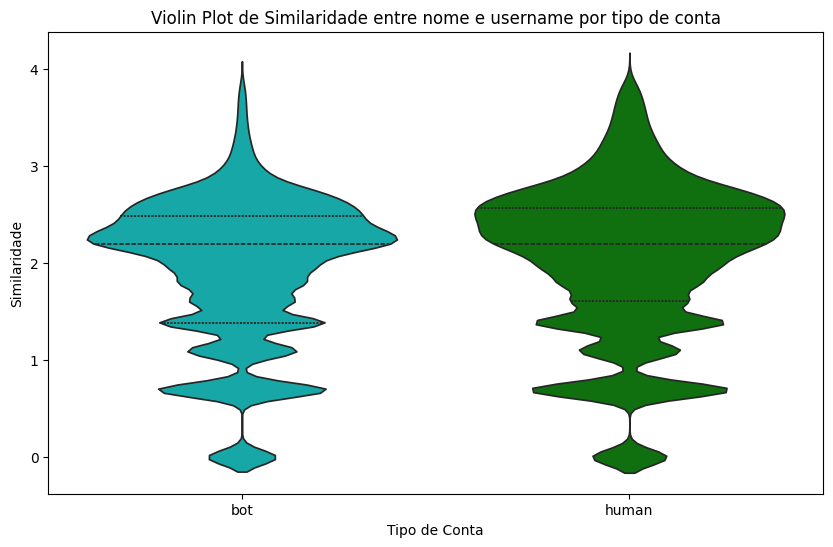

Bots - Similaridade entre nome e username:
count    100000.000000
mean          1.948962
std           0.745230
min           0.000000
25%           1.386294
50%           2.197225
75%           2.484907
max           3.931826
Name: similarityBetweenNameAndUsernameScore, dtype: float64

Humanos - Similaridade entre nome e username:
count    100000.000000
mean          2.054436
std           0.804926
min           0.000000
25%           1.609438
50%           2.197225
75%           2.564949
max           4.007333
Name: similarityBetweenNameAndUsernameScore, dtype: float64


In [ ]:
# histograma kde
plt.figure(figsize=(10, 6))
sns.histplot(df_bot['similarityBetweenNameAndUsernameScore'], color='blue', kde=True, label='Bots', bins=50)
sns.histplot(df_human['similarityBetweenNameAndUsernameScore'], color='green', kde=True, label='Humanos', bins=50)
plt.xlabel('Similaridade')
plt.ylabel('Densidade')
plt.legend()
plt.title('Distribuição da Similaridade entre nome e username')
plt.show()

#histograma bot
plt.figure(figsize=(10, 6))
sns.histplot(df_bot['similarityBetweenNameAndUsernameScore'], color='blue', kde=True, label='Bots', bins=50)
plt.xlabel('Similaridade')
plt.ylabel('Densidade')
plt.legend()
plt.title('Bots - Distribuição da Similaridade entre nome e username')
plt.show()

#histograma human
plt.figure(figsize=(10, 6))
sns.histplot(df_human['similarityBetweenNameAndUsernameScore'], color='green', kde=True, label='Humanos', bins=50)
plt.xlabel('Similaridade')
plt.ylabel('Densidade')
plt.legend()
plt.title('Humanos - Distribuição da Similaridade entre nome e username')
plt.show()

# boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='accountType', y='similarityBetweenNameAndUsernameScore', data=df, palette={"human": "g", "bot": "c"})
plt.xlabel('Tipo de Conta')
plt.ylabel('Similaridade')
plt.title('Box Plot de Similaridade entre nome e username por tipo de conta')
plt.show()

# violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='accountType', y='similarityBetweenNameAndUsernameScore', data=df, inner='quartile', palette={"human": "g", "bot": "c"})
plt.xlabel('Tipo de Conta')
plt.ylabel('Similaridade')
plt.title('Violin Plot de Similaridade entre nome e username por tipo de conta')
plt.show()


print("Bots - Similaridade entre nome e username:")
print(df_bot['similarityBetweenNameAndUsernameScore'].describe())
print("\nHumanos - Similaridade entre nome e username:")
print(df_human['similarityBetweenNameAndUsernameScore'].describe())

# Pesos, limites e função de *classificação*

### Calculando limites superiores
como nenhuma das regras tem valores negativos, o limite inferior sempre é 0, logo só precisa do limite superior

In [ ]:
# Substituir NaN pela média em todas as colunas numéricas
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns  # Seleciona apenas as colunas numéricas
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())
print(df.isna().sum())

followingToFollowerRatioScore            0
retweetToTweetRatioScore                 0
mentionsPerUserScore                     0
tweetSizeAvgScore                        0
accountAgeScore                          0
hashtagUsageScore                        0
tweetCountToAccountAgeScore              0
similarityBetweenNameAndUsernameScore    0
avgTimeBetweenPostsScore                 0
accountType                              0
dtype: int64


In [ ]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns  # Seleciona apenas as colunas numéricas
df[numeric_cols].mean()

,0
followingToFollowerRatioScore,0.830054
retweetToTweetRatioScore,0.408773
mentionsPerUserScore,0.792305
tweetSizeAvgScore,3.979375
accountAgeScore,7.974458
hashtagUsageScore,0.448633
tweetCountToAccountAgeScore,0.759549
similarityBetweenNameAndUsernameScore,2.001699
avgTimeBetweenPostsScore,10.769260


In [ ]:
# Seleciona só colunas numéricas
numeric_df = df.select_dtypes(include=np.number)

# Preenche valores nulos de cada coluna com a média de cada coluna
numeric_df.fillna(numeric_df.mean(), inplace=True)

In [ ]:
import pandas as pd

def calculate_global_upper_limits(df: pd.DataFrame, percentile: float = 0.95) -> dict:
    # Inicializando um dicionário para armazenar os limites superiores
    upper_limits = {}

    # Iterando sobre cada coluna que queremos calcular o limite
    for column in df.columns:
        # Calculando o limite superior com base no percentil especificado
        if pd.api.types.is_numeric_dtype(df[column]):
            upper_limits[column] = df[column].quantile(percentile)

    return upper_limits

# Exemplo de uso
global_upper_limits = calculate_global_upper_limits(df, percentile=0.95)
print(global_upper_limits)


{'followingToFollowerRatioScore': 1.3882923637825637, 'retweetToTweetRatioScore': 0.7724203614544531, 'mentionsPerUserScore': 2.19722457733622, 'tweetSizeAvgScore': 5.527048298122435, 'accountAgeScore': 8.655737000864297, 'hashtagUsageScore': 0.6931471805599453, 'tweetCountToAccountAgeScore': 2.9111870105955147, 'similarityBetweenNameAndUsernameScore': 3.044522437723423, 'avgTimeBetweenPostsScore': 15.30830204408227, 'accountScore': 7.73557488941305}


### Função de Classificação

In [ ]:
# regras_pesos = {
#     "followingToFollowerRatioScore": 1.5,
#     "retweetToTweetRatioScore": 1.5,
#     "mentionsPerUserScore": 0.9,
#     "tweetSizeAvgScore": 1.5,
#     "accountAgeScore": 2,
#     "hashtagUsageScore": 2,
#     "tweetCountToAccountAgeScore": 2,
#     "similarityBetweenNameAndUsernameScore": 0.75,
#     "avgTimeBetweenPostsScore": 1.5
# }

regras_pesos = {
    "followingToFollowerRatioScore": 1.1,
    "retweetToTweetRatioScore": 1.2,
    "mentionsPerUserScore": 0.9,
    "tweetSizeAvgScore": 1.2,
    "accountAgeScore": 1.4,
    "hashtagUsageScore": 1.4,
    "tweetCountToAccountAgeScore": 1.5,
    "similarityBetweenNameAndUsernameScore": 0.8,
    "avgTimeBetweenPostsScore": 1.1
}

limites_superiores = {'followingToFollowerRatioScore': 1.3882923637825637, 'retweetToTweetRatioScore': 0.7724203614544531, 'mentionsPerUserScore': 2.2823823856765264, 'tweetSizeAvgScore': 5.527048298122435, 'accountAgeScore': 8.655737000864297, 'hashtagUsageScore': 0.6931471805599453, 'tweetCountToAccountAgeScore': 2.912957369961373, 'similarityBetweenNameAndUsernameScore': 3.044522437723423, 'avgTimeBetweenPostsScore': 15.321715596373654}

def normalize(value, min_value, max_value):
    return (value - min_value) / (max_value - min_value)

def categorize_account(row, limits, weights):
    score = 0
    min_value = 0  # Assumindo que o valor mínimo é 0 para todas as métricas

    score += normalize(row['followingToFollowerRatioScore'], min_value, limits['followingToFollowerRatioScore']) * weights['followingToFollowerRatioScore']
    score += normalize(row['retweetToTweetRatioScore'], min_value, limits['retweetToTweetRatioScore']) * weights['retweetToTweetRatioScore']
    score += normalize(row['mentionsPerUserScore'], min_value, limits['mentionsPerUserScore']) * weights['mentionsPerUserScore']
    score += normalize(row['tweetSizeAvgScore'], min_value, limits['tweetSizeAvgScore']) * weights['tweetSizeAvgScore']
    score += (1 - normalize(row['accountAgeScore'], min_value, limits['accountAgeScore'])) * weights['accountAgeScore']  # Invertido
    score += normalize(row['hashtagUsageScore'], min_value, limits['hashtagUsageScore']) * weights['hashtagUsageScore']
    score += (1 - normalize(row['tweetCountToAccountAgeScore'], min_value, limits['tweetCountToAccountAgeScore'])) * weights['tweetCountToAccountAgeScore']  # Invertido
    score += normalize(row['avgTimeBetweenPostsScore'], min_value, limits['avgTimeBetweenPostsScore']) * weights['avgTimeBetweenPostsScore']
    score += (1 - normalize(row['similarityBetweenNameAndUsernameScore'], min_value, limits['similarityBetweenNameAndUsernameScore'])) * weights['similarityBetweenNameAndUsernameScore']  # Invertido

    # Converter o score para um valor entre 0 e 100
    return normalize(score, 0, 10)

df['accountScore'] = df.apply(lambda row: categorize_account(row, limites_superiores, regras_pesos), axis=1)

# Analise estatistica entre pontuação e anotação

Comparações envolvendo a pontuação atribuida `accountScore` pela função de classificação e com a anotação que já é oriunda do dataset original vinda em `accountType`

In [ ]:
bots = df[df['accountType'] == 'bot']
humans = df[df['accountType'] == 'human']

In [ ]:
print('BOTS')
print(bots['accountScore'].describe())
print('\nHUMANS')
print(humans['accountScore'].describe())

BOTS
count    100000.000000
mean          0.579603
std           0.141221
min           0.024479
25%           0.488321
50%           0.608991
75%           0.686813
max           0.939588
Name: accountScore, dtype: float64

HUMANS
count    100000.000000
mean          0.548703
std           0.121623
min          -0.011203
25%           0.467996
50%           0.554676
75%           0.636016
max           0.951630
Name: accountScore, dtype: float64


<ipython-input-20-13f98be051ca>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='accountType', y='accountScore', data=df, palette=["#3498db", "#2ecc71"])


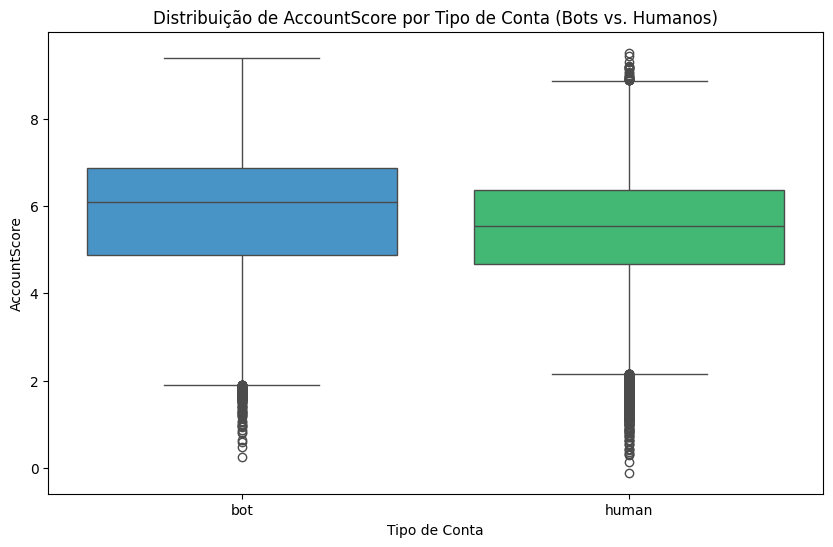

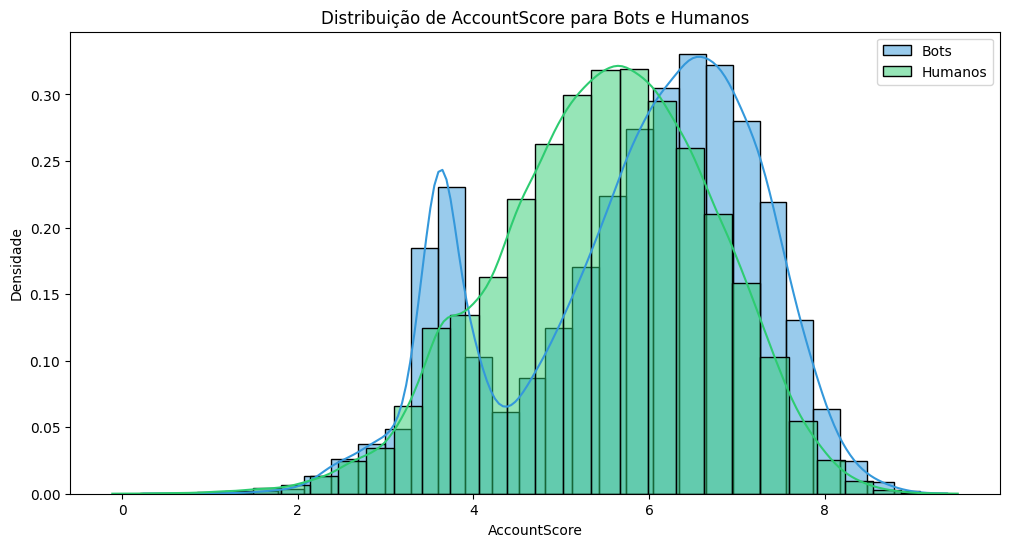

<ipython-input-20-13f98be051ca>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='accountType', y='accountScore', data=df, palette=["#3498db", "#2ecc71"], split=True)


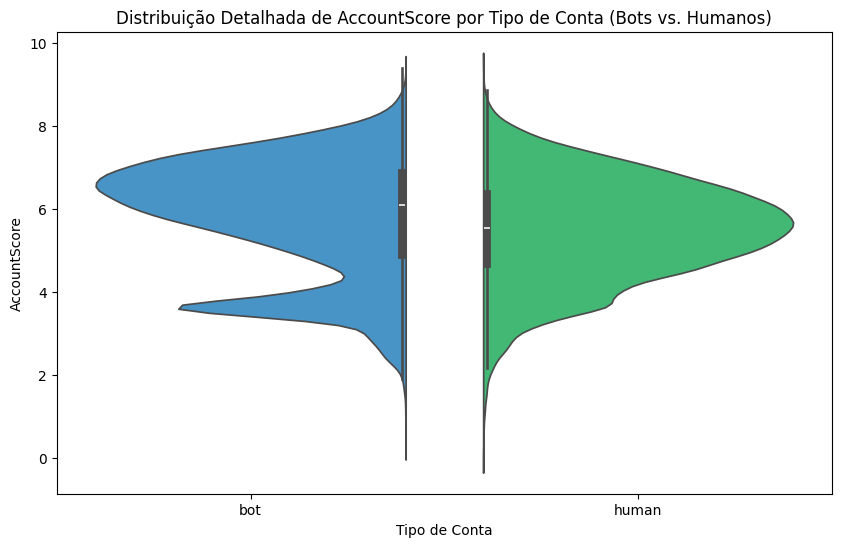

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurando o estilo do gráfico
plt.figure(figsize=(10, 6))

# Boxplot para a distribuição do accountScore por tipo de conta
sns.boxplot(x='accountType', y='accountScore', data=df, palette=["#3498db", "#2ecc71"])
plt.title("Distribuição de AccountScore por Tipo de Conta (Bots vs. Humanos)")
plt.xlabel("Tipo de Conta")
plt.ylabel("AccountScore")
plt.show()

# Configurando o estilo do gráfico
plt.figure(figsize=(12, 6))

# Histograma para a distribuição de accountScore para bots
sns.histplot(data=df[df['accountType'] == 'bot'], x='accountScore', color='#3498db', kde=True, label='Bots', bins=30, stat='density')
sns.histplot(data=df[df['accountType'] == 'human'], x='accountScore', color='#2ecc71', kde=True, label='Humanos', bins=30, stat='density')
plt.title("Distribuição de AccountScore para Bots e Humanos")
plt.xlabel("AccountScore")
plt.ylabel("Densidade")
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))

# Violin plot para visualização detalhada da distribuição por tipo de conta
sns.violinplot(x='accountType', y='accountScore', data=df, palette=["#3498db", "#2ecc71"], split=True)
plt.title("Distribuição Detalhada de AccountScore por Tipo de Conta (Bots vs. Humanos)")
plt.xlabel("Tipo de Conta")
plt.ylabel("AccountScore")
plt.show()


In [ ]:
from scipy.stats import shapiro

# Teste de normalidade para bots e humanos
bots_scores = df[df['accountType'] == 'bot']['accountScore']
humans_scores = df[df['accountType'] == 'human']['accountScore']

# Teste Shapiro-Wilk para normalidade
shapiro_bots = shapiro(bots_scores)
shapiro_humans = shapiro(humans_scores)

print("Shapiro-Wilk Test para Bots:", shapiro_bots)
print("Shapiro-Wilk Test para Humanos:", shapiro_humans)


Shapiro-Wilk Test para Bots: ShapiroResult(statistic=0.9643228102371489, pvalue=7.746371999946285e-86)
Shapiro-Wilk Test para Humanos: ShapiroResult(statistic=0.9979411085658766, pvalue=1.9136148208864806e-31)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 100000.
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
from scipy.stats import mannwhitneyu

mann_whitney_result = mannwhitneyu(bots_scores, humans_scores)
print("Teste de Mann-Whitney U:", mann_whitney_result)


Teste de Mann-Whitney U: MannwhitneyuResult(statistic=5922253662.0, pvalue=0.0)


In [ ]:
from scipy.stats import kstest
from scipy.stats import anderson

ks_bots = kstest(bots_scores, 'norm')
ks_humans = kstest(humans_scores, 'norm')

print("Kolmogorov-Smirnov Test para Bots:", ks_bots)
print("Kolmogorov-Smirnov Test para Humanos:", ks_humans)


anderson_bots = anderson(bots_scores)
anderson_humans = anderson(humans_scores)

print("Anderson-Darling Test para Bots:", anderson_bots)
print("Anderson-Darling Test para Humanos:", anderson_humans)


Kolmogorov-Smirnov Test para Bots: KstestResult(statistic=0.9848028621640248, pvalue=0.0, statistic_location=2.4095027501176003, statistic_sign=-1)
Kolmogorov-Smirnov Test para Humanos: KstestResult(statistic=0.9854882182985107, pvalue=0.0, statistic_location=2.560121300943661, statistic_sign=-1)
Anderson-Darling Test para Bots: AndersonResult(statistic=1315.6951088845672, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=5.992744815432823, scale=1.4484180211410058)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')
Anderson-Darling Test para Humanos: AndersonResult(statistic=35.24648770826752, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=5.610853376957392, scale=1.2592437051407925)
 success: True
 message: '`anderson` successfully fit the dist

AUC: 0.5837


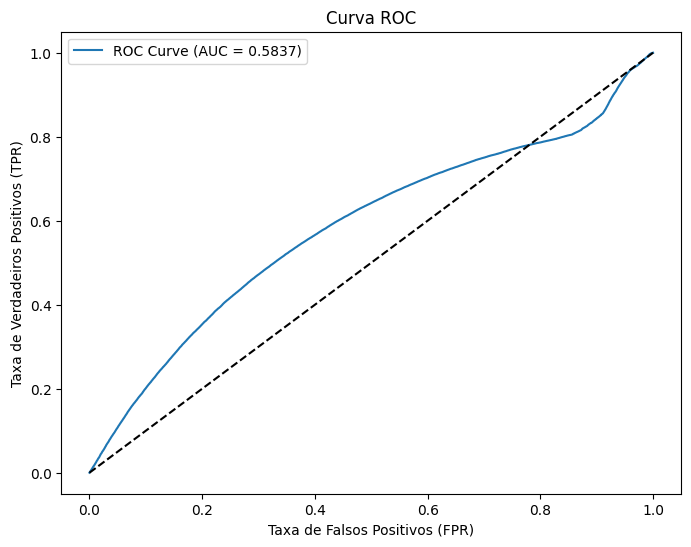

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular as probabilidades preditas (ou scores normalizados)
y_scores = df['accountScore']
y_true = df['accountType'].map({'human': 0, 'bot': 1})

# Curva ROC e AUC
fpr, tpr, thresholds = roc_curve(y_true, y_scores)
auc = roc_auc_score(y_true, y_scores)
print(f"AUC: {auc:.4f}")

# Plotar a Curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.4f})")
plt.plot([0, 1], [0, 1], 'k--')  # Linha diagonal
plt.xlabel("Taxa de Falsos Positivos (FPR)")
plt.ylabel("Taxa de Verdadeiros Positivos (TPR)")
plt.title("Curva ROC")
plt.legend()
plt.show()


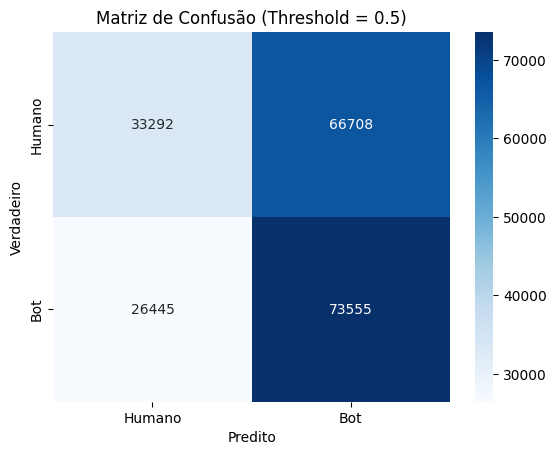

Relatório de Classificação:
              precision    recall  f1-score   support

      Humano       0.56      0.33      0.42    100000
         Bot       0.52      0.74      0.61    100000

    accuracy                           0.53    200000
   macro avg       0.54      0.53      0.51    200000
weighted avg       0.54      0.53      0.51    200000



In [ ]:
# Definir um threshold inicial (por exemplo, o ponto de corte para maximizar TPR e minimizar FPR)
threshold = 0.5  # Este é um ponto de partida, ajuste conforme necessário

# Aplicar o threshold para classificação
y_pred = (y_scores >= threshold).astype(int)

# Matriz de Confusão
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Humano', 'Bot'], yticklabels=['Humano', 'Bot'])
plt.xlabel("Predito")
plt.ylabel("Verdadeiro")
plt.title(f"Matriz de Confusão (Threshold = {threshold})")
plt.show()

# Relatório de Classificação
print("Relatório de Classificação:")
print(classification_report(y_true, y_pred, target_names=['Humano', 'Bot']))

In [ ]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Definir o intervalo de thresholds
thresholds = np.arange(0.5, 0.71, 0.01)

# Criar uma lista para armazenar as estatísticas
threshold_stats = []

account_scores = df['accountScore']
y_true = df['accountType'].map({'human': 0, 'bot': 1})

# Loop para calcular as estatísticas para cada threshold
for threshold in thresholds:
    y_pred = (account_scores >= threshold).astype(int)

    # Calcular as métricas
    precision = precision_score(y_true, y_pred, pos_label=1)
    recall = recall_score(y_true, y_pred, pos_label=1)
    f1 = f1_score(y_true, y_pred, pos_label=1)
    accuracy = accuracy_score(y_true, y_pred)

    # Adicionar os resultados na lista
    threshold_stats.append({
        'Threshold': threshold,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Accuracy': accuracy
    })

# Transformar em DataFrame para fácil visualização
import pandas as pd
threshold_stats_df = pd.DataFrame(threshold_stats)
print(threshold_stats_df)


    Threshold  Precision   Recall  F1 Score  Accuracy
0        0.50   0.524408  0.73555  0.612287  0.534235
1        0.51   0.530912  0.72204  0.611898  0.542040
2        0.52   0.537729  0.70707  0.610881  0.549610
3        0.53   0.544389  0.69040  0.608762  0.556295
4        0.54   0.551615  0.67217  0.605954  0.562895
5        0.55   0.558847  0.65166  0.601695  0.568620
6        0.56   0.566527  0.63080  0.596939  0.574075
7        0.57   0.574261  0.60685  0.590106  0.578475
8        0.58   0.581441  0.58122  0.581330  0.581410
9        0.59   0.589383  0.55455  0.571436  0.584100
10       0.60   0.597295  0.52648  0.559656  0.585760
11       0.61   0.604742  0.49708  0.545651  0.586095
12       0.62   0.612997  0.46627  0.529660  0.585950
13       0.63   0.620046  0.43557  0.511689  0.584330
14       0.64   0.628579  0.40400  0.491867  0.582640
15       0.65   0.635101  0.37027  0.467805  0.578765
16       0.66   0.641895  0.33729  0.442214  0.574560
17       0.67   0.649367  0.

# Otimização da função de classificação

In [ ]:
df_v2 = df.copy()

1. Análise de Correlação com a Variável Target

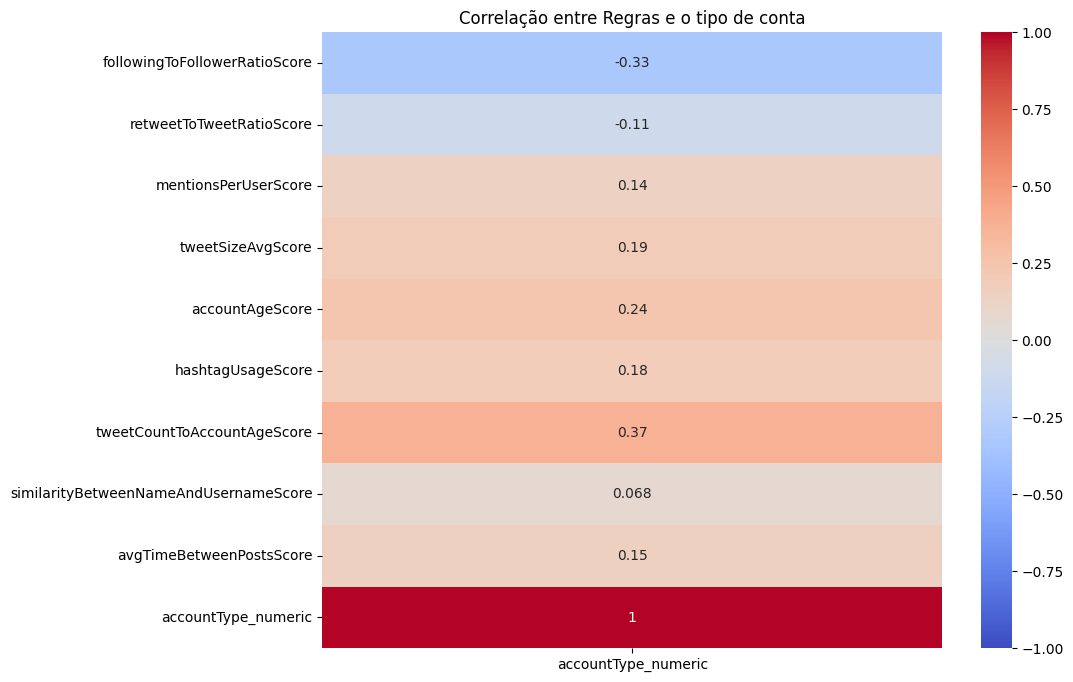

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd # import pandas explicitly

# Calcule a correlação entre cada regra e a variável target 'accountType'
# Convert 'accountType' to numerical before calculating correlation
df_v2['accountType_numeric'] = pd.factorize(df_v2['accountType'])[0]  # Create a numerical representation of 'accountType'
correlation_df = df_v2.select_dtypes(include=['number']).corr() # Select only numerical columns for correlation

# Visualize a correlação com um heatmap, focando nas colunas que você quer avaliar
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_df[['accountType_numeric']], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlação entre Regras e o tipo de conta')
plt.show()


2. Coeficientes de Regressão Logística

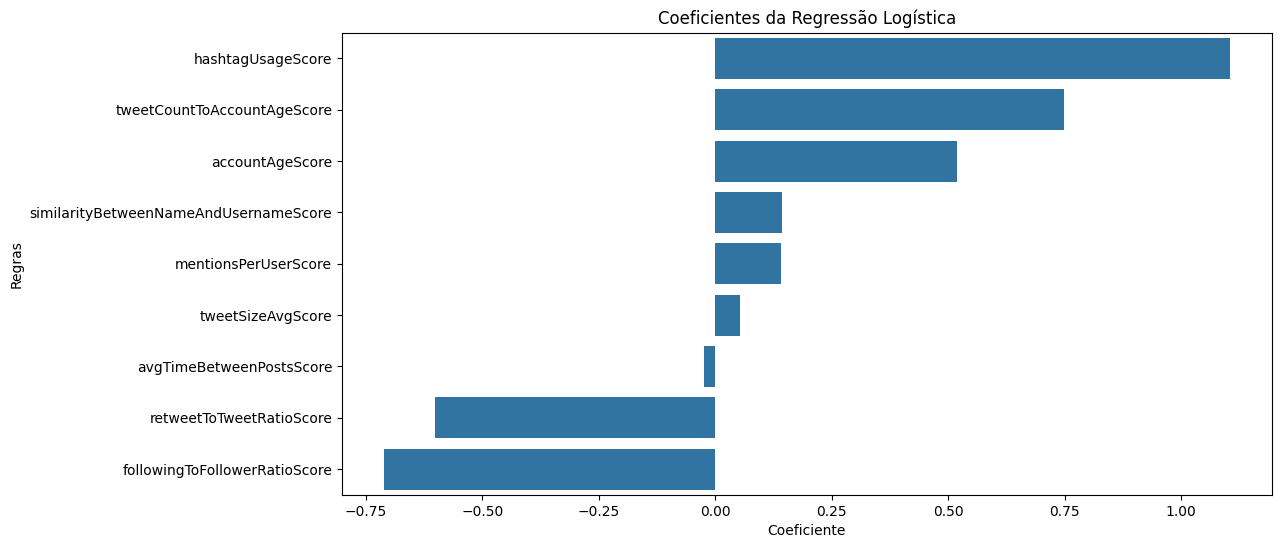

In [ ]:
from sklearn.linear_model import LogisticRegression
import pandas as pd

# Defina X e y para o modelo
X = df_v2.drop(columns=['accountType', 'accountType_numeric'])
y = df_v2['accountType']

# Treine o modelo de regressão logística
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X, y)

# Crie um DataFrame com os coeficientes das variáveis
coef_df = pd.DataFrame({
    'Regras': X.columns,
    'Coeficiente': log_reg.coef_[0]
}).sort_values(by='Coeficiente', ascending=False)

# Visualize os coeficientes
plt.figure(figsize=(12, 6))
sns.barplot(data=coef_df, x='Coeficiente', y='Regras')
plt.title('Coeficientes da Regressão Logística')
plt.show()


5. Gráficos de Distribuição com KDEs
python

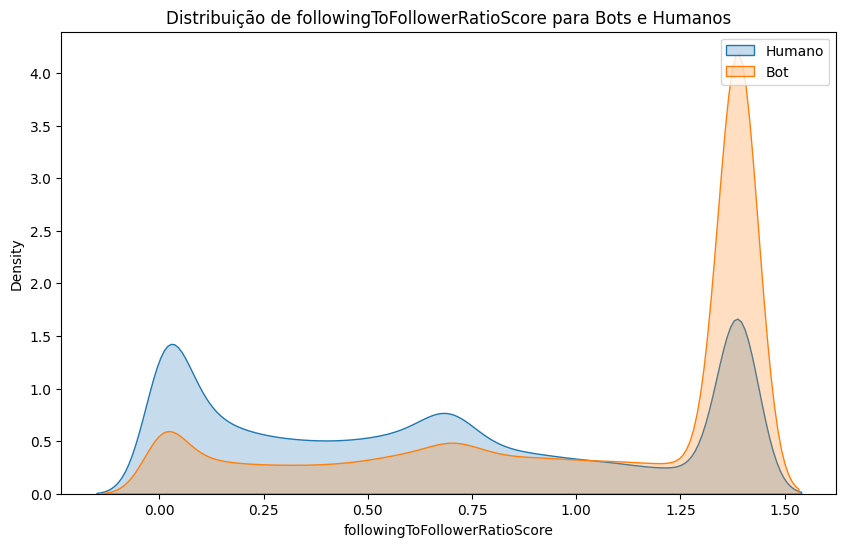

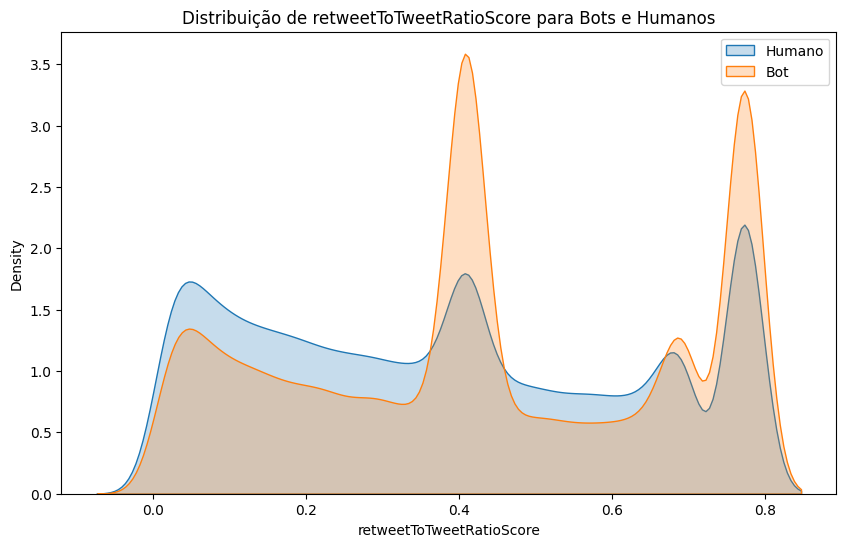

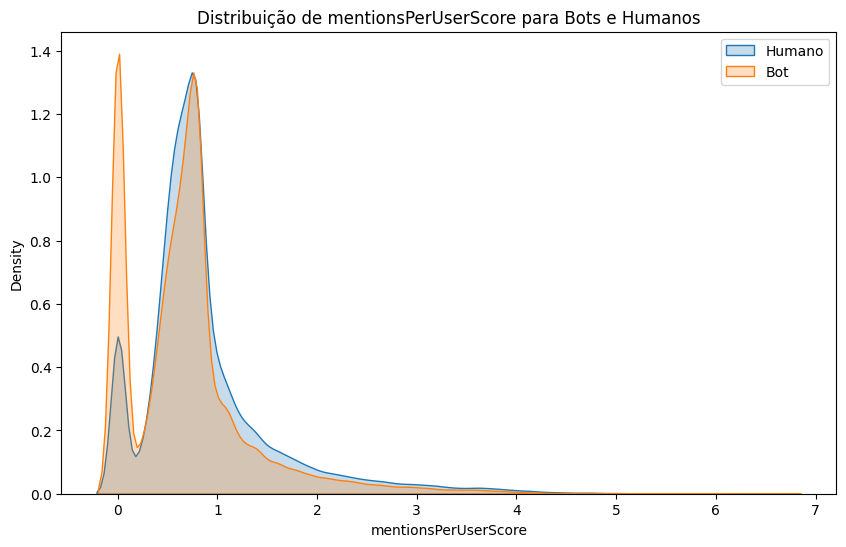

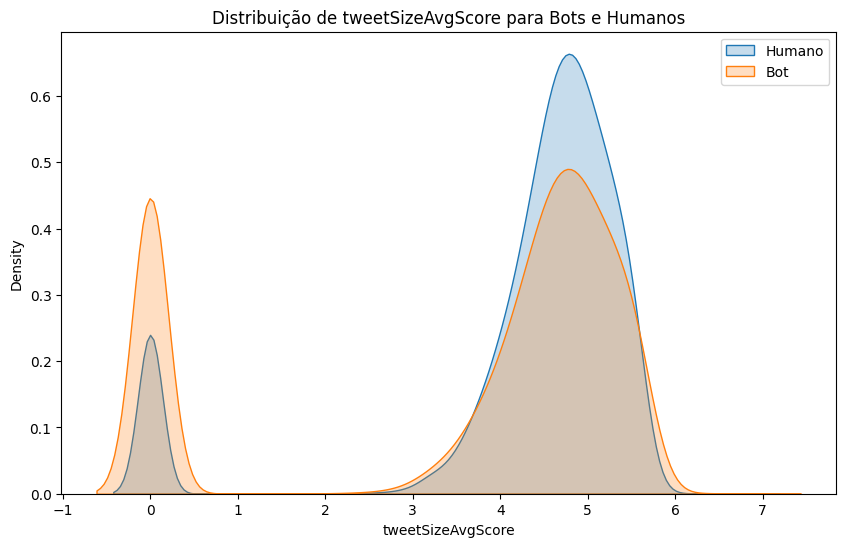

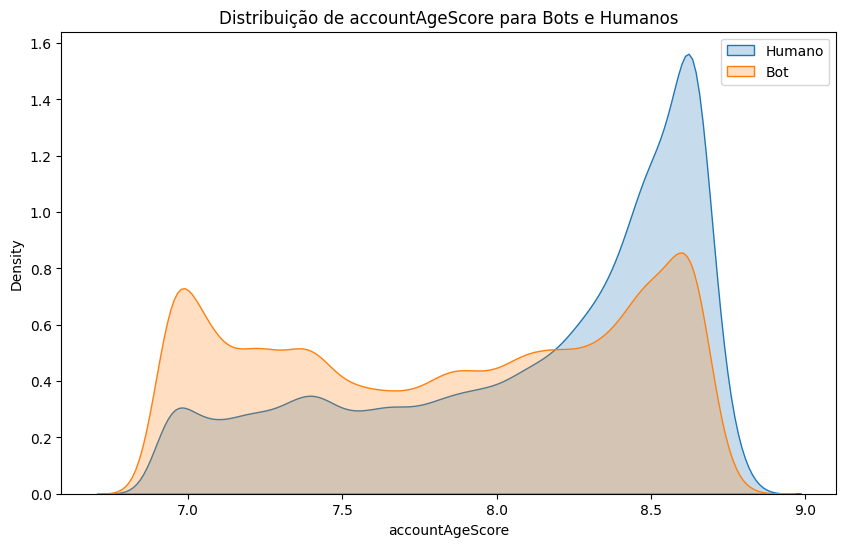

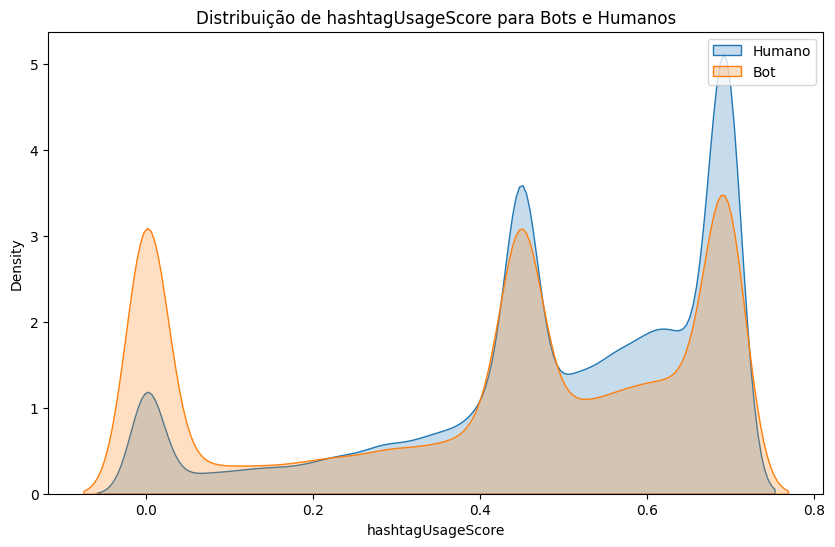

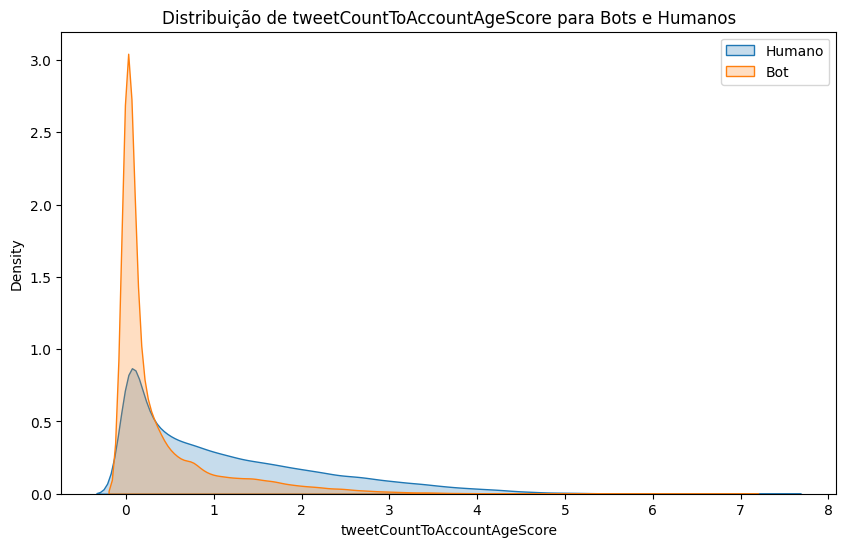

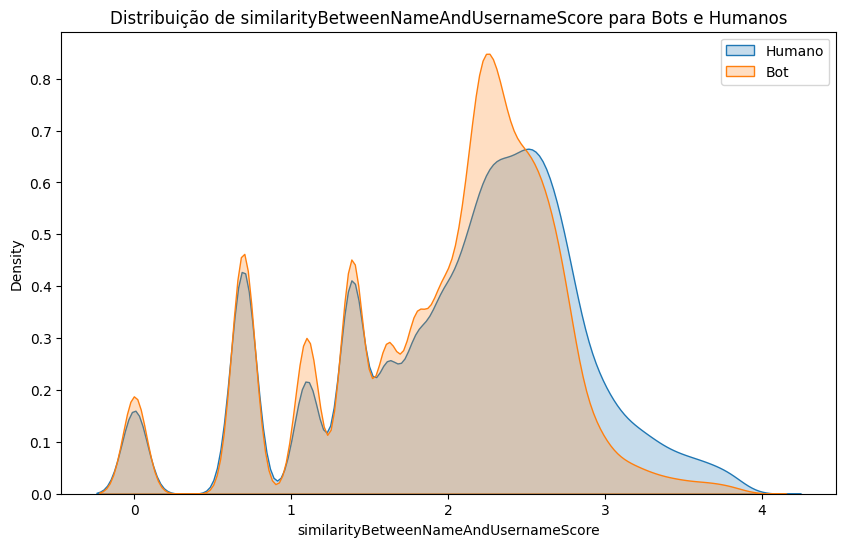

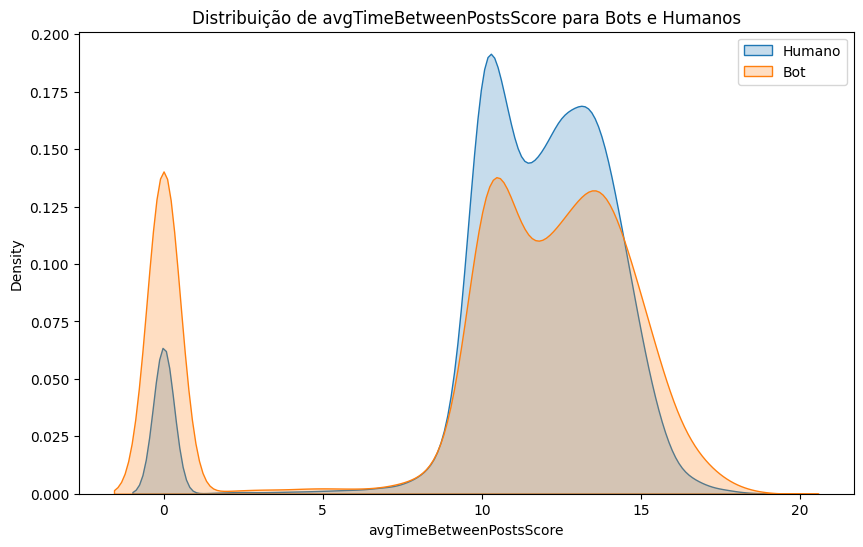

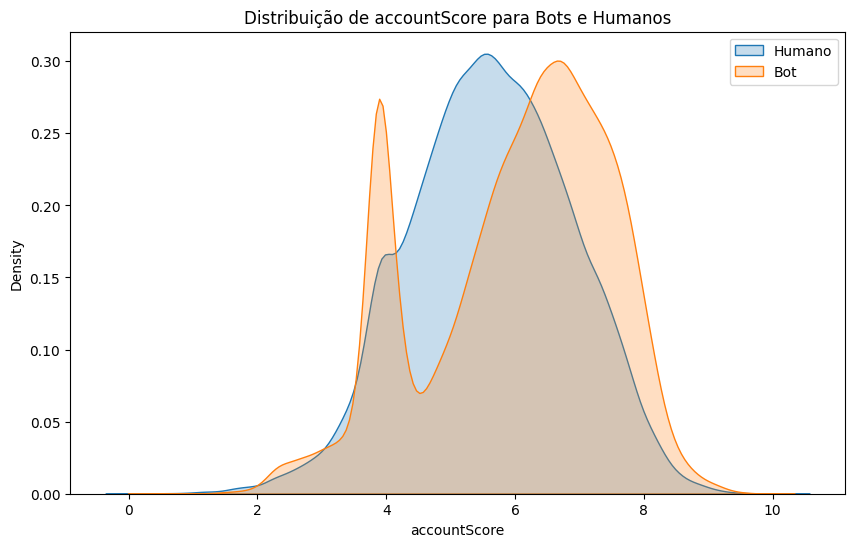

In [ ]:
# KDE para cada regra
for coluna in X.columns:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(data=df_v2[df_v2['accountType'] == 'human'], x=coluna, label='Humano', fill=True)
    sns.kdeplot(data=df_v2[df_v2['accountType'] == 'bot'], x=coluna, label='Bot', fill=True)
    plt.title(f'Distribuição de {coluna} para Bots e Humanos')
    plt.xlabel(coluna)
    plt.legend()
    plt.show()


3. Importância das Variáveis com Random Forest
python

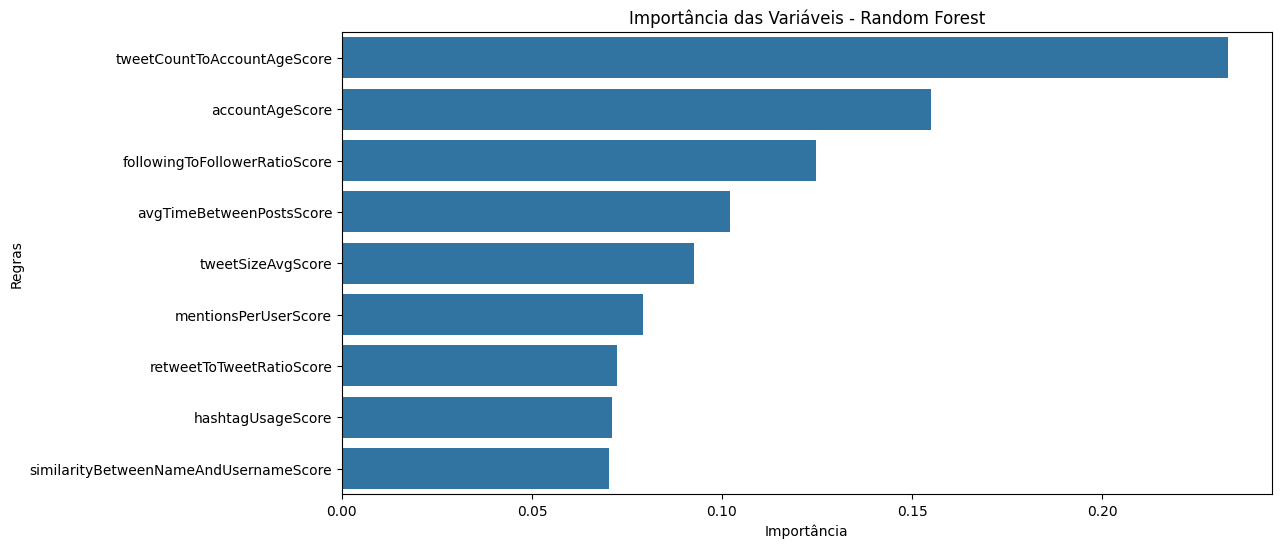

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Treine o modelo de Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# Crie um DataFrame com a importância das variáveis
importance_df = pd.DataFrame({
    'Regras': X.columns,
    'Importância': rf_model.feature_importances_
}).sort_values(by='Importância', ascending=False)

# Visualize a importância das variáveis
plt.figure(figsize=(12, 6))
sns.barplot(data=importance_df, x='Importância', y='Regras')
plt.title('Importância das Variáveis - Random Forest')
plt.show()


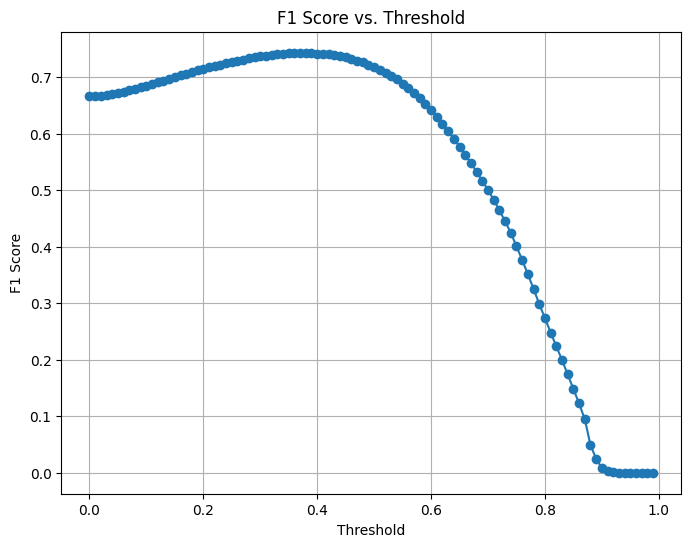

Melhor threshold: 0.37, Melhor F1 Score: 0.7430867964229353


(0.37, 0.7430867964229353)

In [ ]:
# Calcular threshold otimo

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
import pandas as pd

def find_best_threshold(classifier, X_test, y_test):
    # Obtenha as probabilidades de classificação para a classe positiva (bot)
    y_prob = classifier.predict_proba(X_test)[:, 1]

    # Inicialize as variáveis para armazenar o melhor threshold e a melhor pontuação F1
    best_threshold = 0.0
    best_f1 = 0.0

    # Teste diferentes thresholds entre 0 e 1 em intervalos de 0.01
    thresholds = np.arange(0, 1, 0.01)
    f1_scores = []

    for threshold in thresholds:
        # Converta probabilidades em predições binárias (0 ou 1) com base no threshold atual
        y_pred = (y_prob >= threshold).astype(int)

        # Calcule a pontuação F1 para o threshold atual
        f1 = f1_score(y_test, y_pred)
        f1_scores.append(f1)

        # Verifique se a pontuação F1 atual é a melhor encontrada
        if f1 > best_f1:
            best_f1 = f1
            best_threshold = threshold

    # Exiba a métrica F1 em função dos thresholds
    plt.figure(figsize=(8, 6))
    plt.plot(thresholds, f1_scores, marker='o')
    plt.xlabel('Threshold')
    plt.ylabel('F1 Score')
    plt.title('F1 Score vs. Threshold')
    plt.grid()
    plt.show()

    print(f"Melhor threshold: {best_threshold}, Melhor F1 Score: {best_f1}")

    return best_threshold, best_f1

# Defina X e y para o modelo
X = df_v2.drop(columns=['accountType', 'accountType_numeric'])
y = df_v2['accountType'].map({'bot': 1, 'human': 0})

# Treine o modelo de regressão logística
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X, y)

# Exemplo de uso:
# Certifique-se de que o `classifier` já esteja treinado.
find_best_threshold(log_reg, X, y)

# Conjunto de teste

In [ ]:
test_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Regras de detecção/test_sample_analysis.csv')

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   accountType                            1000 non-null   object 
 1   followingToFollowerRatioScore          1000 non-null   float64
 2   retweetToTweetRatioScore               884 non-null    float64
 3   mentionsPerUserScore                   884 non-null    float64
 4   tweetSizeAvgScore                      1000 non-null   float64
 5   accountAgeScore                        1000 non-null   float64
 6   hashtagUsageScore                      884 non-null    float64
 7   tweetCountToAccountAgeScore            1000 non-null   float64
 8   similarityBetweenNameAndUsernameScore  1000 non-null   float64
 9   avgTimeBetweenPostsScore               1000 non-null   float64
 10  createdAt                              1000 non-null   object 
 11  updat

In [ ]:
regras_pesos = {
    "followingToFollowerRatioScore": 1.1,
    "retweetToTweetRatioScore": 1.2,
    "mentionsPerUserScore": 0.9,
    "tweetSizeAvgScore": 1.2,
    "accountAgeScore": 1.4,
    "hashtagUsageScore": 1.4,
    "tweetCountToAccountAgeScore": 1.5,
    "similarityBetweenNameAndUsernameScore": 0.8,
    "avgTimeBetweenPostsScore": 1.1
}

limites_superiores = {'followingToFollowerRatioScore': 1.3882923637825637, 'retweetToTweetRatioScore': 0.7724203614544531, 'mentionsPerUserScore': 2.2823823856765264, 'tweetSizeAvgScore': 5.527048298122435, 'accountAgeScore': 8.655737000864297, 'hashtagUsageScore': 0.6931471805599453, 'tweetCountToAccountAgeScore': 2.912957369961373, 'similarityBetweenNameAndUsernameScore': 3.044522437723423, 'avgTimeBetweenPostsScore': 15.321715596373654}

def normalize(value, min_value, max_value):
    return (value - min_value) / (max_value - min_value)

def categorize_account(row, limits, weights):
    score = 0
    min_value = 0  # Assumindo que o valor mínimo é 0 para todas as métricas

    score += normalize(row['followingToFollowerRatioScore'], min_value, limits['followingToFollowerRatioScore']) * weights['followingToFollowerRatioScore']
    score += normalize(row['retweetToTweetRatioScore'], min_value, limits['retweetToTweetRatioScore']) * weights['retweetToTweetRatioScore']
    score += normalize(row['mentionsPerUserScore'], min_value, limits['mentionsPerUserScore']) * weights['mentionsPerUserScore']
    score += normalize(row['tweetSizeAvgScore'], min_value, limits['tweetSizeAvgScore']) * weights['tweetSizeAvgScore']
    score += (1 - normalize(row['accountAgeScore'], min_value, limits['accountAgeScore'])) * weights['accountAgeScore']  # Invertido
    score += normalize(row['hashtagUsageScore'], min_value, limits['hashtagUsageScore']) * weights['hashtagUsageScore']
    score += (1 - normalize(row['tweetCountToAccountAgeScore'], min_value, limits['tweetCountToAccountAgeScore'])) * weights['tweetCountToAccountAgeScore']  # Invertido
    score += normalize(row['avgTimeBetweenPostsScore'], min_value, limits['avgTimeBetweenPostsScore']) * weights['avgTimeBetweenPostsScore']
    score += (1 - normalize(row['similarityBetweenNameAndUsernameScore'], min_value, limits['similarityBetweenNameAndUsernameScore'])) * weights['similarityBetweenNameAndUsernameScore']  # Invertido

    # Converter o score para um valor entre 0 e 100
    return normalize(score, 0, 10)

test_df['accountScore'] = test_df.apply(lambda row: categorize_account(row, limites_superiores, regras_pesos), axis=1)

In [ ]:
test_bots = df[df['accountType'] == 'bot']
test_humans = df[df['accountType'] == 'human']

In [ ]:
print('BOTS')
print(bots['accountScore'].describe())
print('\nHUMANS')
print(humans['accountScore'].describe())

BOTS
count    100000.000000
mean          0.579603
std           0.141221
min           0.024479
25%           0.488321
50%           0.608991
75%           0.686813
max           0.939588
Name: accountScore, dtype: float64

HUMANS
count    100000.000000
mean          0.548703
std           0.121623
min          -0.011203
25%           0.467996
50%           0.554676
75%           0.636016
max           0.951630
Name: accountScore, dtype: float64


<ipython-input-36-c6ae28d629f8>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='accountType', y='accountScore', data=test_df, palette=["#3498db", "#2ecc71"])


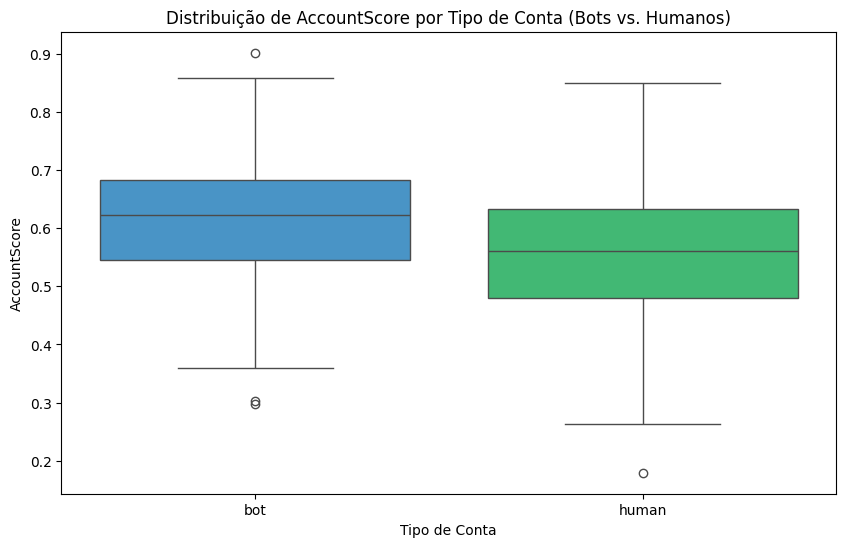

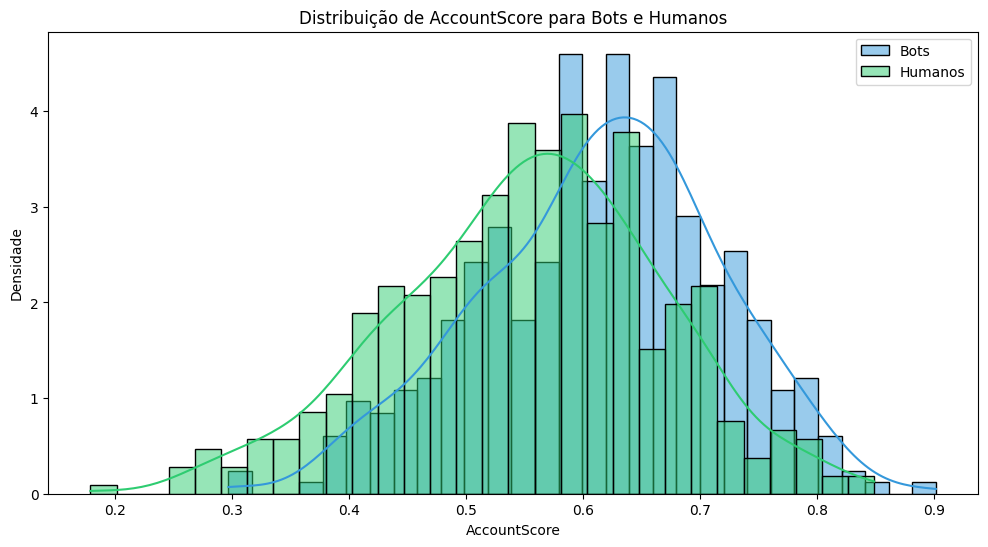

<ipython-input-36-c6ae28d629f8>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='accountType', y='accountScore', data=test_df, palette=["#3498db", "#2ecc71"], split=True)


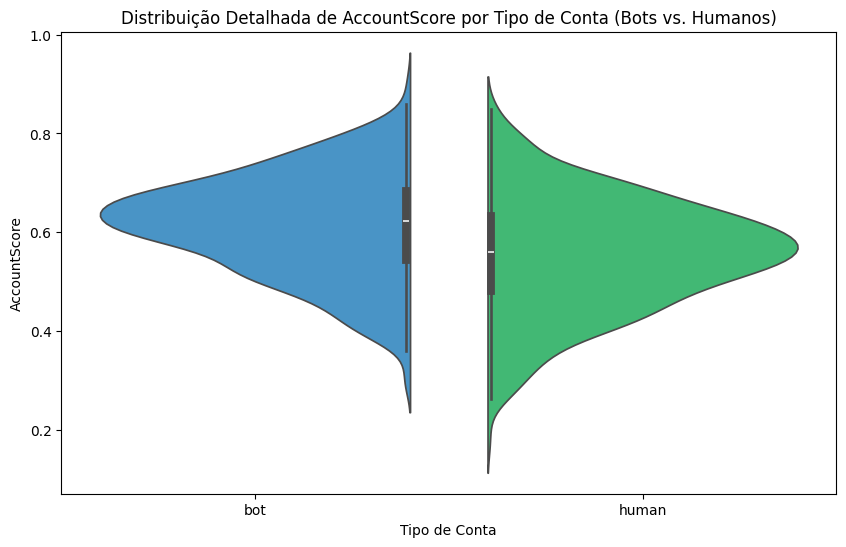

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurando o estilo do gráfico
plt.figure(figsize=(10, 6))

# Boxplot para a distribuição do accountScore por tipo de conta
sns.boxplot(x='accountType', y='accountScore', data=test_df, palette=["#3498db", "#2ecc71"])
plt.title("Distribuição de AccountScore por Tipo de Conta (Bots vs. Humanos)")
plt.xlabel("Tipo de Conta")
plt.ylabel("AccountScore")
plt.show()

# Configurando o estilo do gráfico
plt.figure(figsize=(12, 6))

# Histograma para a distribuição de accountScore para bots
sns.histplot(data=test_df[test_df['accountType'] == 'bot'], x='accountScore', color='#3498db', kde=True, label='Bots', bins=30, stat='density')
sns.histplot(data=test_df[test_df['accountType'] == 'human'], x='accountScore', color='#2ecc71', kde=True, label='Humanos', bins=30, stat='density')
plt.title("Distribuição de AccountScore para Bots e Humanos")
plt.xlabel("AccountScore")
plt.ylabel("Densidade")
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))

# Violin plot para visualização detalhada da distribuição por tipo de conta
sns.violinplot(x='accountType', y='accountScore', data=test_df, palette=["#3498db", "#2ecc71"], split=True)
plt.title("Distribuição Detalhada de AccountScore por Tipo de Conta (Bots vs. Humanos)")
plt.xlabel("Tipo de Conta")
plt.ylabel("AccountScore")
plt.show()

accountType                              0
followingToFollowerRatioScore            0
retweetToTweetRatioScore                 0
mentionsPerUserScore                     0
tweetSizeAvgScore                        0
accountAgeScore                          0
hashtagUsageScore                        0
tweetCountToAccountAgeScore              0
similarityBetweenNameAndUsernameScore    0
avgTimeBetweenPostsScore                 0
createdAt                                0
updatedAt                                0
accountScore                             0
dtype: int64
AUC: 0.6400


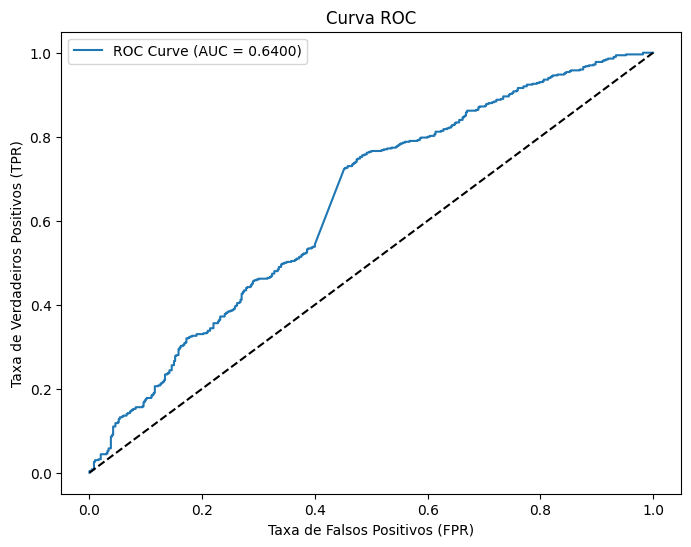

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Substituir NaN pela média em todas as colunas numéricas
test_df_no_nan = test_df.copy()
numeric_cols = test_df_no_nan.select_dtypes(include=['float64', 'int64']).columns  # Seleciona apenas as colunas numéricas
test_df_no_nan[numeric_cols] = test_df_no_nan[numeric_cols].fillna(test_df_no_nan[numeric_cols].mean())
print(test_df_no_nan.isna().sum())

# Calcular as probabilidades preditas (ou scores normalizados)
y_scores = test_df_no_nan['accountScore']
y_true = test_df_no_nan['accountType'].map({'human': 0, 'bot': 1})

# Curva ROC e AUC
fpr, tpr, thresholds = roc_curve(y_true, y_scores)
auc = roc_auc_score(y_true, y_scores)
print(f"AUC: {auc:.4f}")

# Plotar a Curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.4f})")
plt.plot([0, 1], [0, 1], 'k--')  # Linha diagonal
plt.xlabel("Taxa de Falsos Positivos (FPR)")
plt.ylabel("Taxa de Verdadeiros Positivos (TPR)")
plt.title("Curva ROC")
plt.legend()
plt.show()

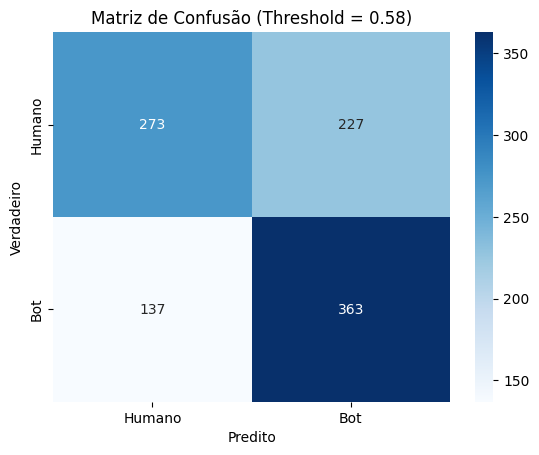

Relatório de Classificação:
              precision    recall  f1-score   support

      Humano       0.67      0.55      0.60       500
         Bot       0.62      0.73      0.67       500

    accuracy                           0.64      1000
   macro avg       0.64      0.64      0.63      1000
weighted avg       0.64      0.64      0.63      1000



In [ ]:
# Definir um threshold inicial (por exemplo, o ponto de corte para maximizar TPR e minimizar FPR)
threshold = 0.58  # Este é um ponto de partida, ajuste conforme necessário

# Aplicar o threshold para classificação
y_pred = (y_scores >= threshold).astype(int)

# Matriz de Confusão
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Humano', 'Bot'], yticklabels=['Humano', 'Bot'])
plt.xlabel("Predito")
plt.ylabel("Verdadeiro")
plt.title(f"Matriz de Confusão (Threshold = {threshold})")
plt.show()

# Relatório de Classificação
print("Relatório de Classificação:")
print(classification_report(y_true, y_pred, target_names=['Humano', 'Bot']))